# Basic Instructions

1. Enter your Name and UID in the provided space.
2. Do the assignment in the notebook itself.
3. You are free to use Google Colab.
4. Upload to Google Drive.
5. Now enter the Google Drive link in the provided space. (you can do this by opening the iPython notebook uploaded using Google Collab).
6. Submit the assignment to Gradescope.

**Note** - You are **NOT** supposed to use Pytorch or other neural networks library for this assignment. You will receive no credit anywhere that Pytorch (or TF, caffe JAX, etc.) is used. Additionally, we don't use cuda here, so you can use the CPU runtime in Colab  -- no need for GPU.


Name:  **Danylo Voloshyn**  
UID:  **118895499**

Link to Google Drive : **https://drive.google.com/file/d/11jee0dDREh-klYq-xlLAkc59zBndkjo_/view?usp=sharing**

# Part 1: Building a 2-layer Neural Network

In the first part, you will implement all the functions required to build a two layer neural network.
In the next part, you will use these functions for image and text classification. Provide your code at the appropriate placeholders.

## Packages

In [22]:
import re

import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
from scipy import ndimage

## 1. Layer Initialization

**Exercise:** Create and initialize the parameters of the 2-layer neural network. Use random initialization for the weight matrices (use `0.01*np.random.randn()` ) and zero initialization for the biases.

In [23]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(1)

    ### START CODE HERE ### (≈ 4 lines of code)

    W1 = 0.01*np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = 0.01*np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    ### END CODE HERE ###

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [24]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]] </td>
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td>
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.01744812 -0.00761207]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td>
  </tr>
  
</table>

## 2. Forward Propagation

Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid.

The linear module computes the following equation:

$$Z = WA+b\tag{4}$$

### 2.1 Exercise - Build the linear part of forward propagation.

In [25]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    ### START CODE HERE ### (≈ 1 line of code)

    Z = W@A + b

    ### END CODE HERE ###

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

In [26]:
np.random.seed(1)

A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**Expected output**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td>
  </tr>
  
</table>

### 2.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. Write the code for the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. Write the code for the  `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)

**Exercise**:
- Implement the activation functions
- Build the linear activation part of forward propagation. Mathematical relation is: $A = g(Z) = g(WA_{prev} +b)$

In [27]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z, useful during backpropagation
    """
    ### START CODE HERE ### (≈ 2 line of code)

    A = 1 / (1 + np.exp(-Z))
    cache = Z

    ### END CODE HERE ###

    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache --  returns Z, useful during backpropagation
    """

    ### START CODE HERE ### (≈ 2 line of code)

    A = np.maximum(0, Z)
    cache = Z

    ### END CODE HERE ###

    assert(A.shape == Z.shape)
    return A, cache

In [28]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)

        A, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(A)

        ### END CODE HERE ###

    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)

        A, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(A)

        ### END CODE HERE ###

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [29]:
np.random.seed(2)
A_prev = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td>
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td>
  </tr>
</table>


## 3. Loss function

Now you will implement forward and backward propagation. You need to compute the loss, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy loss $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{ (i)}\right) + (1-y^{(i)})\log\left(1- a^{(i)}\right)) \tag{7}$$

In [30]:
# GRADED FUNCTION: compute_loss

def compute_loss(A, Y):
    """
    Implement the loss function defined by equation (7).

    Arguments:
    A -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    loss -- cross-entropy loss
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)

    loss = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

In [31]:
Y = np.asarray([[1, 1, 1]])
A = np.array([[.8,.9,0.4]])

print("loss = " + str(compute_loss(A, Y)))

loss = 0.41493159961539694


**Expected Output**:

<table>
    <tr>
    <td>**loss** </td>
    <td> 0.41493159961539694</td>
    </tr>
</table>

## 4. Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters.

Now, similar to forward propagation, you are going to build the backward propagation in two steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation


Following are the relationships -
\begin{align}
dA_{prev} &= W^{T}dZ\\
dW &= dZ A_{prev}^{T} \\
db &= \sum_{i=1}^m dZ^{(i)} \: \text{       where m is the number of samples} \\
    &= dZ \hat I \: \text{    where $\hat I$ is a column vector of size(m,1) with all entries 1 }
\end{align}

### 4.1 - Linear backward

In [32]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the loss with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the loss with respect to W (current layer l), same shape as W
    db -- Gradient of the loss with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)

    dA_prev = W.T@dZ
    dW = dZ@A_prev.T
    db = dZ@np.ones((m, 1))

    ### END CODE HERE ###

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [33]:
np.random.seed(1)
dZ = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
linear_cache = (A, W, b)

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.2015379   2.81370193  3.2998501 ]]
db = [[1.01258895]]


**Expected Output**:

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td>
  </tr>
    <tr>
        <td> **dW** </td>
        <td > [[-0.2015379   2.81370193  3.2998501 ]] </td>
    </tr>
    <tr>
        <td> **db** </td>
        <td> [[1.01258895]] </td>
    </tr>     
</table>

### 4.2 - Linear Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**.

Before implementing `linear_activation_backward`, you need to implement two backward functions for each activations:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function,
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Exercise**:
- Implement the backward functions for the relu and sigmoid activation layer.
- Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [34]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the loss with respect to Z
    """

    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    ### START CODE HERE ### (≈ 1 line of code)

    dZ = dA * (Z > 0)

    ### END CODE HERE ###

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the loss with respect to Z
    """

    Z = cache

    ### START CODE HERE ### (≈ 2 line of code)

    s = sigmoid(Z)[0]
    dZ = dA * (s * (1 - s))

    ### END CODE HERE ###

    assert (dZ.shape == Z.shape)

    return dZ


In [35]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the loss with respect to W (current layer l), same shape as W
    db -- Gradient of the loss with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)

        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        ### END CODE HERE ###

    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)

        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

        ### END CODE HERE ###

    return dA_prev, dW, db

In [36]:
np.random.seed(2)
dA = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dA, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.20533573  0.19557101 -0.03936168]]
db = [[-0.11459244]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.89027649  0.74742835 -0.20957978]]
db = [[-0.41675785]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td>
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td>
  </tr>
    <tr>
    <td > dW </td>
           <td > [[ 0.20533573  0.19557101 -0.03936168]] </td>
  </tr>
    <tr>
    <td > db </td>
           <td > [[-0.11459244]] </td>
  </tr>
</table>

**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td>
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td>
  </tr>
    <tr>
    <td > dW </td>
           <td > [[ 0.89027649  0.74742835 -0.20957978]] </td>
  </tr>
    <tr>
    <td > db </td>
           <td > [[-0.41675785]] </td>
  </tr>
</table>

## 5. Update Parameters

In this section you will update the parameters of the model, using gradient descent:

$$ W^{[1]} = W^{[1]} - \alpha \text{ } dW^{[1]} \tag{16}$$
$$ b^{[1]} = b^{[1]} - \alpha \text{ } db^{[1]} \tag{17}$$
$$ W^{[2]} = W^{[2]} - \alpha \text{ } dW^{[2} \tag{16}$$
$$ b^{[2]} = b^{[2]} - \alpha \text{ } db^{[2]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary.

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent.


In [37]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """
    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 4 lines of code)

    for k in parameters.keys():
      parameters[k] -= learning_rate * grads['d' + k]

    ### END CODE HERE ###
    return parameters

In [38]:
np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%">
    <tr>
    <td > W1 </td>
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td>
  </tr>
    <tr>
    <td > b1 </td>
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td>
  </tr>
  <tr>
    <td > W2 </td>
           <td > [[-0.55569196  0.0354055   1.32964895]]</td>
  </tr>
    <tr>
    <td > b2 </td>
           <td > [[-0.84610769]] </td>
  </tr>
</table>



## Conclusion

Congrats on implementing all the functions required for building a deep neural network!

If this was challenging, that means you're learning. Also, the next part of the assignment is easier.



# Part 2: Image Classification with a 2-layer Neural Network

In the next part you will put all these together to build a two-layer neural networks for image classification.

In [39]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

**Problem Statement**: You are given a dataset ("data/train_catvnoncat.h5", "data/test_catvnoncat.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by completing the function and run the cell below.

In [40]:
def load_data(train_file, test_file):
    # Load the training data
    train_dataset = h5py.File(train_file, 'r')
    # Separate features(x) and labels(y) for training set
    train_set_x_orig = np.array(train_dataset['train_set_x'])
    train_set_y_orig = np.array(train_dataset['train_set_y'])

    # Load the test data
    test_dataset = h5py.File(test_file, 'r')

    # Separate features(x) and labels(y) for training set
    test_set_x_orig = np.array(test_dataset['test_set_x'])
    test_set_y_orig = np.array(test_dataset['test_set_y'])

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [41]:
train_file="data/train_catvnoncat.h5"
test_file="data/test_catvnoncat.h5"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_file, test_file)

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images.

y = 0. It's a non-cat picture.


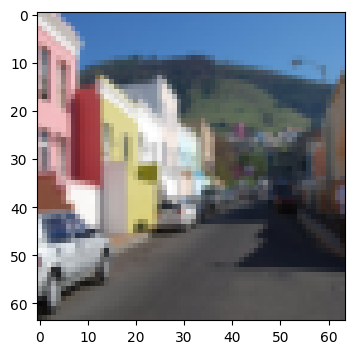

In [42]:
# Example of a picture
index = 1
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [43]:
# Explore your dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network.

<img src="imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [44]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## Architecture

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

###  2-layer neural network

<img src="2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$.
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias).
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.


##  General methodology

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute loss function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop)
    4. Use trained parameters to predict labels

Let's now implement those the model!

In [45]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

## 6. Training a Neural Network

**Exercise**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_loss(AL, Y):
    ...
    return loss
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```


In [46]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_loss=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_loss -- If set to True, this will print the loss every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    np.random.seed(1)
    grads = {}
    losses = []                              # to keep track of the loss
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)

    parameters = initialize_parameters(n_x, n_h, n_y)

    ### END CODE HERE ###

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)

        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

        ### END CODE HERE ###

        # Compute loss
        ### START CODE HERE ### (≈ 1 line of code)

        loss = compute_loss(A2, Y)

        ### END CODE HERE ###

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2)) / m

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

        ### END CODE HERE ###

        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        ### START CODE HERE ### (≈ 4 lines of code)

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        ### END CODE HERE ###


        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)

        parameters = update_parameters(parameters, grads, learning_rate)

        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        # Print the loss every 100 training example
        if print_loss and i % 100 == 0:
            print("Loss after iteration {}: {}".format(i, np.squeeze(loss)))
        if print_loss and i % 100 == 0:
            losses.append(loss)

    # plot the loss

    plt.plot(np.squeeze(losses))
    plt.ylabel('loss')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6464320953428849
Loss after iteration 200: 0.6325140647912677
Loss after iteration 300: 0.6015024920354665
Loss after iteration 400: 0.5601966311605747
Loss after iteration 500: 0.5158304772764729
Loss after iteration 600: 0.4754901313943325
Loss after iteration 700: 0.4339163151225749
Loss after iteration 800: 0.4007977536203889
Loss after iteration 900: 0.3580705011323798
Loss after iteration 1000: 0.3394281538366412
Loss after iteration 1100: 0.30527536361962637
Loss after iteration 1200: 0.27491377282130175
Loss after iteration 1300: 0.24681768210614824
Loss after iteration 1400: 0.19850735037466108
Loss after iteration 1500: 0.17448318112556666
Loss after iteration 1600: 0.17080762978096406
Loss after iteration 1700: 0.11306524562164721
Loss after iteration 1800: 0.09629426845937145
Loss after iteration 1900: 0.08342617959726856
Loss after iteration 2000: 0.07439078704319078
Loss after iteration 2100: 0.06630748

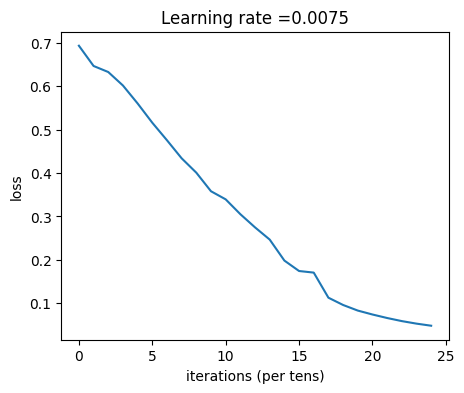

In [47]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_loss=True)

**Expected Output**:
<table>
    <tr>
        <td> **Loss after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Loss after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Loss after iteration 2400**</td>
        <td> 0.048554785628770206 </td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset.

## 7. Inference for Your Neural Network

***Exercise:***
- Implement the forward function
- Implement the predict function below to make prediction on test_images

In [48]:
def two_layer_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    A2 -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X

    # Implement LINEAR -> RELU. Add "cache" to the "caches" list.
    ### START CODE HERE ### (approx. 3 line of code)

    A1, cache1 = linear_activation_forward(A, parameters['W1'], parameters['b1'], 'relu')
    caches.append(cache1)

    ### END CODE HERE ###

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (approx. 3 line of code)

    A2, cache2 = linear_activation_forward(A1, parameters['W2'], parameters['b2'], 'sigmoid')
    caches.append(cache2)

    ### END CODE HERE ###

    assert(A2.shape == (1,X.shape[1]))

    return A2, caches

In [49]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    ### START CODE HERE ### (≈ 1 lines of code)
    
    probas, caches = two_layer_forward(X, parameters)
    
    ### END CODE HERE ###

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        ### START CODE HERE ### (≈ 4 lines of code)
        
        p[0][i] = probas[0][i] > 0.5
        
        ### END CODE HERE ###

    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

In [50]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [51]:
test_x.shape

(12288, 50)

In [52]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


## 8. Explore and Explain Hyperparameters

***Exercise:***
Identify the hyperparameters in the model and For each hyperparameter
- Briefly explain its role
- Explore a range of values and describe their impact on (a) training loss and (b) test accuracy
- Report the best hyperparameter value found.

Note: Provide your results and explanations in the answer for this question.

**Type your answer here**

The hyperparameters in this model are learning rate, model shape, and epochs. We could also play with batch size, activation functions, optimizers and other things, but that would require modifying the model code.

Learning rate is the multiplier on the gradient when the weights and biases are updated. It moderates this change so it's not too steep yet converges in a timely manner. The shape of the network is the number of layers and the size of those layers, and in this case, we change the size of the single hidden layer. Epoch are iterations of looking at the entire training data, and using more of them can further decrease the loss or reveal issues such as overfitting, especially when using a validation set.

MODIFYING LEARNING RATE:
LEARNING RATE: 0.002
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6775125634407722
Loss after iteration 200: 0.6534285444568212
Loss after iteration 300: 0.6482658651825991
Loss after iteration 400: 0.6457325421349124
Loss after iteration 500: 0.6428645678687207
Loss after iteration 600: 0.6393791238752349
Loss after iteration 700: 0.6349825827506616
Loss after iteration 800: 0.6293482982334792
Loss after iteration 900: 0.6222168842769188
Loss after iteration 1000: 0.6134573023160638
Loss after iteration 1100: 0.6036770948850194
Loss after iteration 1200: 0.5932405951139496
Loss after iteration 1300: 0.5824220557574608
Loss after iteration 1400: 0.5712333802180791
Loss after iteration 1500: 0.559725032555888
Loss after iteration 1600: 0.5482618460965571
Loss after iteration 1700: 0.5365231536382626
Loss after iteration 1800: 0.5243433865732096
Loss after iteration 1900: 0.5121243746288671
Loss after iteration 2000: 0.5002853007405352
Lo

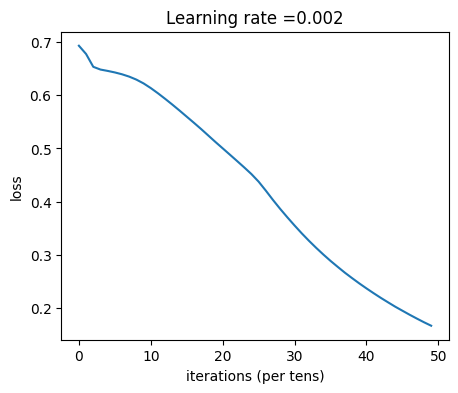

Accuracy: 0.74
LEARNING RATE: 0.004
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6534727867209377
Loss after iteration 200: 0.6457517296704457
Loss after iteration 300: 0.6394159595294021
Loss after iteration 400: 0.6294219571372102
Loss after iteration 500: 0.613576954237384
Loss after iteration 600: 0.5934003966909057
Loss after iteration 700: 0.5714148742756727
Loss after iteration 800: 0.5484468439502738
Loss after iteration 900: 0.5245360682496796
Loss after iteration 1000: 0.5006246289150571
Loss after iteration 1100: 0.47687244403861584
Loss after iteration 1200: 0.4535567440588531
Loss after iteration 1300: 0.42248883194774406
Loss after iteration 1400: 0.38725056563546356
Loss after iteration 1500: 0.35699026657668026
Loss after iteration 1600: 0.3278596091933422
Loss after iteration 1700: 0.30199704042971487
Loss after iteration 1800: 0.27849779252387047
Loss after iteration 1900: 0.2582439852433411
Loss after iteration 2000: 0.2382051759131017
Loss a

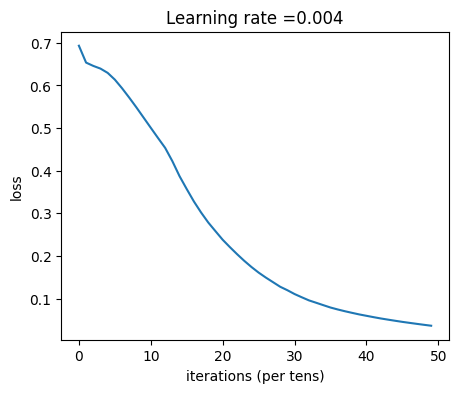

Accuracy: 0.7200000000000001
LEARNING RATE: 0.008
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6457898953839779
Loss after iteration 200: 0.6295685115617379
Loss after iteration 300: 0.5937224012715144
Loss after iteration 400: 0.5488060683040056
Loss after iteration 500: 0.5015928620791906
Loss after iteration 600: 0.4659192774265818
Loss after iteration 700: 0.4122004912685626
Loss after iteration 800: 0.3929120828915471
Loss after iteration 900: 0.3641260895646918
Loss after iteration 1000: 0.31822824393352983
Loss after iteration 1100: 0.27263478228033416
Loss after iteration 1200: 0.24570699849388797
Loss after iteration 1300: 0.2591363844578219
Loss after iteration 1400: 0.18056085451361997
Loss after iteration 1500: 0.2080619049079758
Loss after iteration 1600: 0.11977231109633632
Loss after iteration 1700: 0.10495335335491446
Loss after iteration 1800: 0.08821142431390695
Loss after iteration 1900: 0.07727944853026524
Loss after iteration 2000: 0.067295

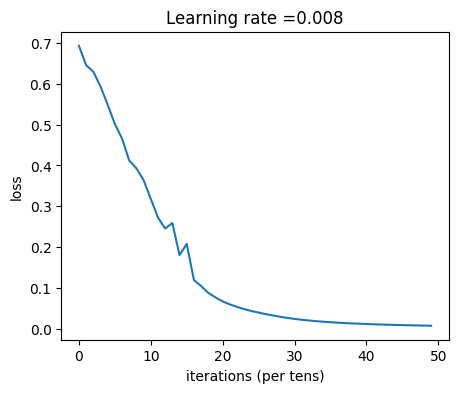

Accuracy: 0.72
LEARNING RATE: 0.016
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6298573476181858
Loss after iteration 200: 0.5493351237768597
Loss after iteration 300: 0.501944988905562
Loss after iteration 400: 0.45359441366430236
Loss after iteration 500: 0.40214550352171274
Loss after iteration 600: 0.38391597309940123
Loss after iteration 700: 0.26872359344271424
Loss after iteration 800: 0.2336617009410823
Loss after iteration 900: 0.20062971570265067
Loss after iteration 1000: 0.1642597556050904
Loss after iteration 1100: 0.11781143647416321
Loss after iteration 1200: 0.10040175557086081
Loss after iteration 1300: 0.1144795412005943
Loss after iteration 1400: 0.21059760861318105
Loss after iteration 1500: 0.0484964003727566
Loss after iteration 1600: 0.035336696412611716
Loss after iteration 1700: 0.02825349073462238
Loss after iteration 1800: 0.023334664257941565
Loss after iteration 1900: 0.019615743089699912
Loss after iteration 2000: 0.01676953208995

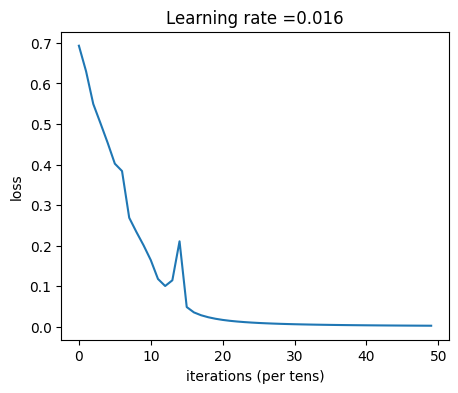

Accuracy: 0.68
LEARNING RATE: 0.032
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.5879902481051817
Loss after iteration 200: 0.4707819036534146
Loss after iteration 300: 0.4539261508263402
Loss after iteration 400: 0.5545430798912848
Loss after iteration 500: 0.3712032854007964
Loss after iteration 600: 0.41465606966705065
Loss after iteration 700: 0.2117010765005254
Loss after iteration 800: 0.2618647885129889
Loss after iteration 900: 0.16879611205865774
Loss after iteration 1000: 0.5787738039128969
Loss after iteration 1100: 0.026797330128426784
Loss after iteration 1200: 0.020038714051123892
Loss after iteration 1300: 0.016111309377314552
Loss after iteration 1400: 0.013588643359474545
Loss after iteration 1500: 0.011907491602642366
Loss after iteration 1600: 0.010661542550238804
Loss after iteration 1700: 0.009738131356197381
Loss after iteration 1800: 0.009001988231639422
Loss after iteration 1900: 0.008420263683917618
Loss after iteration 2000: 0.00793773

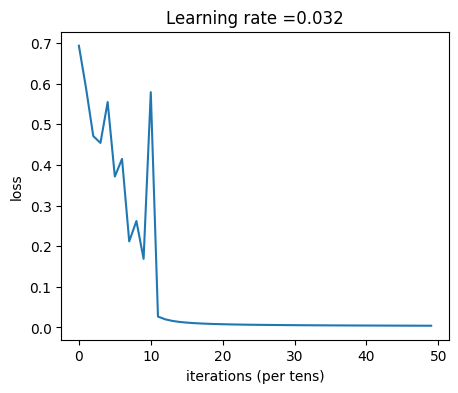

Accuracy: 0.74
LEARNING RATE: 0.064
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6187147129405567
Loss after iteration 200: 0.552918676780282
Loss after iteration 300: 0.5927845742300313
Loss after iteration 400: 0.7533914578499391
Loss after iteration 500: 0.4919183238961553
Loss after iteration 600: 0.233837263215645
Loss after iteration 700: 0.3263514154530005
Loss after iteration 800: 0.35300711931235407
Loss after iteration 900: 0.3230930656086875
Loss after iteration 1000: 0.4098909414671431
Loss after iteration 1100: 0.27754318160578906
Loss after iteration 1200: 0.408717219335364
Loss after iteration 1300: 0.35452136984376126
Loss after iteration 1400: 0.35704264363110333
Loss after iteration 1500: 0.2960057182856936
Loss after iteration 1600: 0.30032743604985385
Loss after iteration 1700: 0.25758510532444817
Loss after iteration 1800: 0.24388472335049763
Loss after iteration 1900: 0.2090864369756238
Loss after iteration 2000: 0.24301163284765467
Loss a

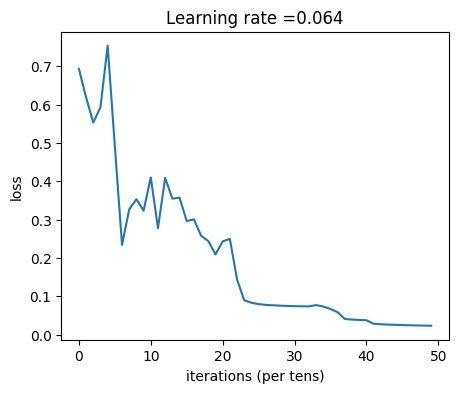

Accuracy: 0.7000000000000001
LEARNING RATE: 0.128
Loss after iteration 0: 0.693049735659989
Loss after iteration 100: 0.6430028501679353
Loss after iteration 200: 0.6449108472744614
Loss after iteration 300: 0.6438288253567556
Loss after iteration 400: 0.643186840539275
Loss after iteration 500: 0.6420071067176422
Loss after iteration 600: 0.640531915584223
Loss after iteration 700: 0.6396742150465198
Loss after iteration 800: 0.6393322054433537
Loss after iteration 900: 0.639168255414487
Loss after iteration 1000: 0.6390723395738209
Loss after iteration 1100: 0.6390172297683638
Loss after iteration 1200: 0.6389843043061852
Loss after iteration 1300: 0.6389614114073537
Loss after iteration 1400: 0.6389442884658433
Loss after iteration 1500: 0.6389506503122726
Loss after iteration 1600: 0.6346929316853629
Loss after iteration 1700: 0.6341351099434578
Loss after iteration 1800: 0.6345124256387276
Loss after iteration 1900: 0.6344778142967019
Loss after iteration 2000: 0.6444769223346353


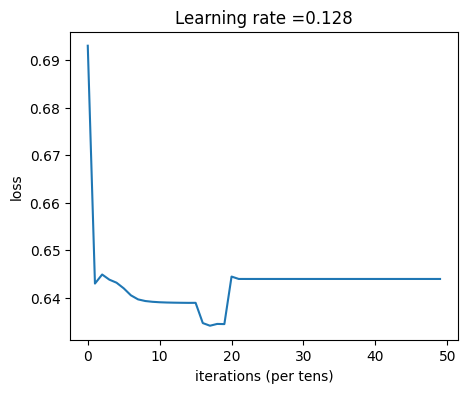

Accuracy: 0.3400000000000001
MODIFYING HIDDEN LAYER SIZE:
LAYER SIZE: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6465700518695148
Loss after iteration 200: 0.6329742063713907
Loss after iteration 300: 0.602519546384048
Loss after iteration 400: 0.5603485399513062
Loss after iteration 500: 0.5164066060176443
Loss after iteration 600: 0.47608041141633844
Loss after iteration 700: 0.44881031301775476
Loss after iteration 800: 0.40730210075137097
Loss after iteration 900: 0.3941794428874613
Loss after iteration 1000: 0.361681266544757
Loss after iteration 1100: 0.3361106683674836
Loss after iteration 1200: 0.3079309300304774
Loss after iteration 1300: 0.2953056658917978
Loss after iteration 1400: 0.2911640691899969
Loss after iteration 1500: 0.25331084079086247
Loss after iteration 1600: 0.2361368283412001
Loss after iteration 1700: 0.2184499839109046
Loss after iteration 1800: 0.2207698320706502
Loss after iteration 1900: 0.23498571481418712
Loss after iterat

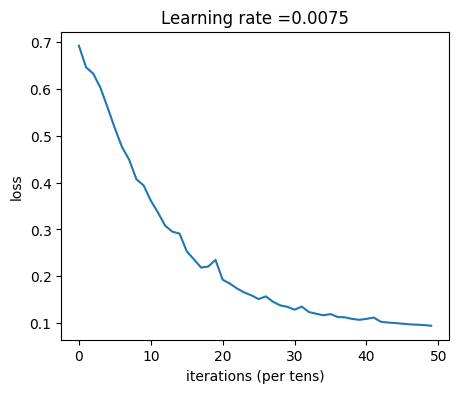

Accuracy: 0.7000000000000001
LAYER SIZE: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6456339759414456
Loss after iteration 200: 0.6302907821326286
Loss after iteration 300: 0.5964299426378616
Loss after iteration 400: 0.5492587038176249
Loss after iteration 500: 0.49339321954806825
Loss after iteration 600: 0.4313059485548762
Loss after iteration 700: 0.378951228116505
Loss after iteration 800: 0.39743025173952967
Loss after iteration 900: 0.37670122200600586
Loss after iteration 1000: 0.3311966071604593
Loss after iteration 1100: 0.30739011254081383
Loss after iteration 1200: 0.24850487514492958
Loss after iteration 1300: 0.16344883471969165
Loss after iteration 1400: 0.22818756553154484
Loss after iteration 1500: 0.11244001376698361
Loss after iteration 1600: 0.0951958249996117
Loss after iteration 1700: 0.08024984678338894
Loss after iteration 1800: 0.06862161295816162
Loss after iteration 1900: 0.0594322205686312
Loss after iteration 2000: 0.05198918805

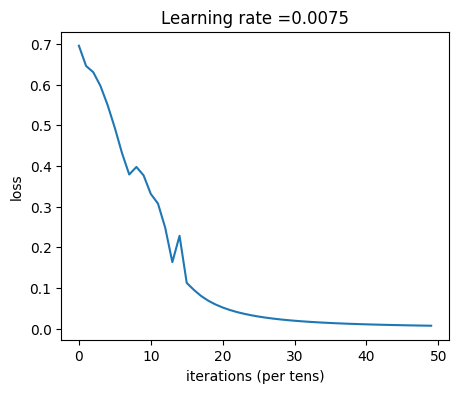

Accuracy: 0.72
LAYER SIZE: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.644814308201784
Loss after iteration 200: 0.6273288170939797
Loss after iteration 300: 0.5903892200247938
Loss after iteration 400: 0.542148012828692
Loss after iteration 500: 0.4834967374723428
Loss after iteration 600: 0.41911705878419603
Loss after iteration 700: 0.37089891875690695
Loss after iteration 800: 0.3594923106400519
Loss after iteration 900: 0.3317997092775254
Loss after iteration 1000: 0.28517013841486427
Loss after iteration 1100: 0.2541426545043791
Loss after iteration 1200: 0.17317144083516214
Loss after iteration 1300: 0.15477827650301249
Loss after iteration 1400: 0.1385818452074044
Loss after iteration 1500: 0.10613495319662113
Loss after iteration 1600: 0.0822217835516038
Loss after iteration 1700: 0.07004272012466191
Loss after iteration 1800: 0.059898760113064574
Loss after iteration 1900: 0.05217691452673472
Loss after iteration 2000: 0.04555846668447845
Loss aft

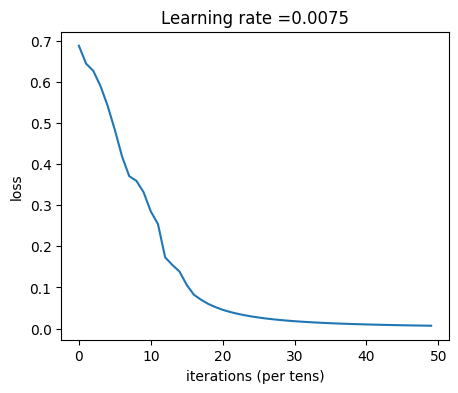

Accuracy: 0.76
LAYER SIZE: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.6449924631195371
Loss after iteration 200: 0.6273661689704657
Loss after iteration 300: 0.5893828178489287
Loss after iteration 400: 0.5362100738462148
Loss after iteration 500: 0.4739293033406392
Loss after iteration 600: 0.4082675020867736
Loss after iteration 700: 0.35615997720166076
Loss after iteration 800: 0.3373835172701585
Loss after iteration 900: 0.30786341495465064
Loss after iteration 1000: 0.26837040426821557
Loss after iteration 1100: 0.23309478367410383
Loss after iteration 1200: 0.1956768200762674
Loss after iteration 1300: 0.14292050962499966
Loss after iteration 1400: 0.11701416371184208
Loss after iteration 1500: 0.09165556723276543
Loss after iteration 1600: 0.07963411306123049
Loss after iteration 1700: 0.06546673923257028
Loss after iteration 1800: 0.05561095399354865
Loss after iteration 1900: 0.048200926193913085
Loss after iteration 2000: 0.042545035780152146
Lo

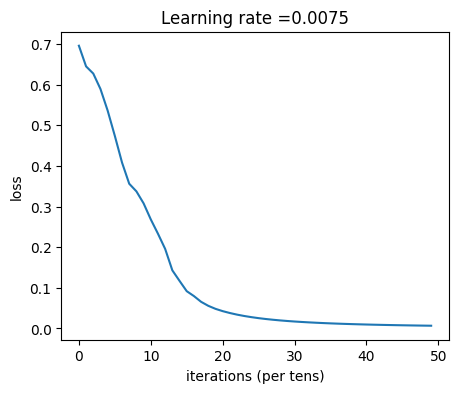

Accuracy: 0.72
LAYER SIZE: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.6416060365650118
Loss after iteration 200: 0.6187380044090856
Loss after iteration 300: 0.5763100319925932
Loss after iteration 400: 0.52130501019724
Loss after iteration 500: 0.45786851908809917
Loss after iteration 600: 0.3913705581445807
Loss after iteration 700: 0.34420617077935517
Loss after iteration 800: 0.32508956732946603
Loss after iteration 900: 0.28775870795060865
Loss after iteration 1000: 0.23281010825189832
Loss after iteration 1100: 0.2514828303445596
Loss after iteration 1200: 0.15970148551422234
Loss after iteration 1300: 0.11922499654134538
Loss after iteration 1400: 0.10019434096227249
Loss after iteration 1500: 0.08237433865234849
Loss after iteration 1600: 0.0691876601824001
Loss after iteration 1700: 0.05932900347511004
Loss after iteration 1800: 0.051427144529496246
Loss after iteration 1900: 0.045200631832736746
Loss after iteration 2000: 0.039954005991522
Loss 

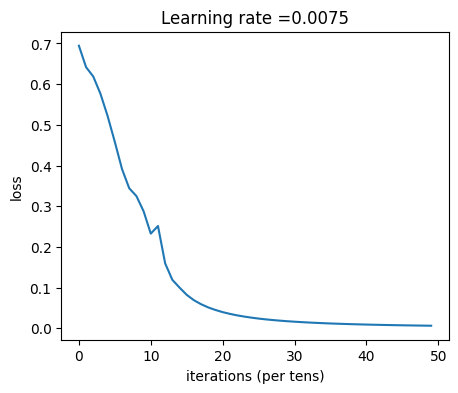

Accuracy: 0.72
LAYER SIZE: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.6311855377997404
Loss after iteration 200: 0.5951094595947566
Loss after iteration 300: 0.5405204866203783
Loss after iteration 400: 0.4762306581503977
Loss after iteration 500: 0.40756753676421315
Loss after iteration 600: 0.346839173351307
Loss after iteration 700: 0.3427798178799478
Loss after iteration 800: 0.3160843931982699
Loss after iteration 900: 0.2739293819252755
Loss after iteration 1000: 0.2233572085670292
Loss after iteration 1100: 0.18231050615984365
Loss after iteration 1200: 0.1521653975801342
Loss after iteration 1300: 0.11547234126705568
Loss after iteration 1400: 0.08451686127859534
Loss after iteration 1500: 0.07064314735005041
Loss after iteration 1600: 0.05995799287476341
Loss after iteration 1700: 0.05209132270855872
Loss after iteration 1800: 0.04552792297218409
Loss after iteration 1900: 0.04025861174610424
Loss after iteration 2000: 0.035849282146152475
Loss 

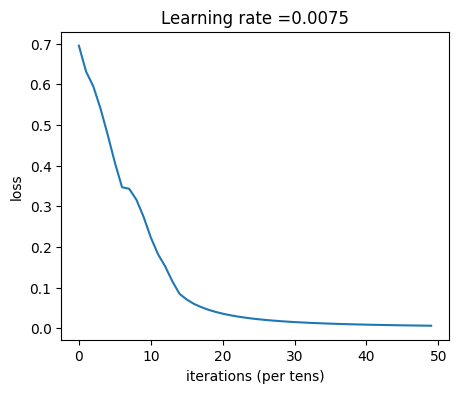

Accuracy: 0.74
LAYER SIZE: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.6264437324861268
Loss after iteration 200: 0.5837879136432984
Loss after iteration 300: 0.5240733029240424
Loss after iteration 400: 0.45569982868769027
Loss after iteration 500: 0.38484078914743597
Loss after iteration 600: 0.327498239128974
Loss after iteration 700: 0.3168098088264051
Loss after iteration 800: 0.2809224605925284
Loss after iteration 900: 0.23078230862175994
Loss after iteration 1000: 0.2141678797379092
Loss after iteration 1100: 0.17050222538143905
Loss after iteration 1200: 0.10790038889332078
Loss after iteration 1300: 0.08797793344652041
Loss after iteration 1400: 0.0727409881599979
Loss after iteration 1500: 0.06192705442450395
Loss after iteration 1600: 0.05328011187805248
Loss after iteration 1700: 0.04643467220260263
Loss after iteration 1800: 0.04091990724537333
Loss after iteration 1900: 0.03629808604155204
Loss after iteration 2000: 0.03246272406462315
Loss

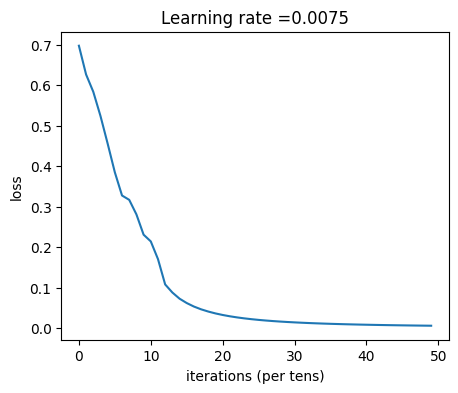

Accuracy: 0.78
LAYER SIZE: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.6081931833400229
Loss after iteration 200: 0.5517213866888371
Loss after iteration 300: 0.4846944333430662
Loss after iteration 400: 0.4126573139100827
Loss after iteration 500: 0.3429093918366175
Loss after iteration 600: 0.3025477109366327
Loss after iteration 700: 0.2762397309536057
Loss after iteration 800: 0.23560982281595608
Loss after iteration 900: 0.18544219920280655
Loss after iteration 1000: 0.1438397691534294
Loss after iteration 1100: 0.10885261853026032
Loss after iteration 1200: 0.08682770852784097
Loss after iteration 1300: 0.07229910748569889
Loss after iteration 1400: 0.061228838331451464
Loss after iteration 1500: 0.05288705177618953
Loss after iteration 1600: 0.04594962870167043
Loss after iteration 1700: 0.04037954567111488
Loss after iteration 1800: 0.035773118053460076
Loss after iteration 1900: 0.0319783076915534
Loss after iteration 2000: 0.028787824549351596
L

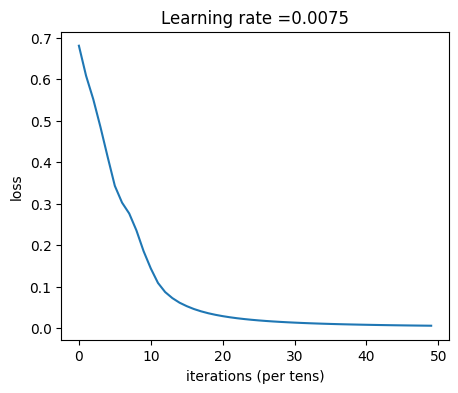

Accuracy: 0.74
LAYER SIZE: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.5768391923175262
Loss after iteration 200: 0.5031749532193887
Loss after iteration 300: 0.4257201772312386
Loss after iteration 400: 0.35124202941836513
Loss after iteration 500: 0.30021130052485984
Loss after iteration 600: 0.2748699071349914
Loss after iteration 700: 0.2297342491899558
Loss after iteration 800: 0.18282686696755815
Loss after iteration 900: 0.13294418597926227
Loss after iteration 1000: 0.1044168427331015
Loss after iteration 1100: 0.08389788214332862
Loss after iteration 1200: 0.07014850759671197
Loss after iteration 1300: 0.059520937211534876
Loss after iteration 1400: 0.0512715251338456
Loss after iteration 1500: 0.044586519846696884
Loss after iteration 1600: 0.039186776603505356
Loss after iteration 1700: 0.03474673609497159
Loss after iteration 1800: 0.03105770301326639
Loss after iteration 1900: 0.02795440213062362
Loss after iteration 2000: 0.0253247828419471

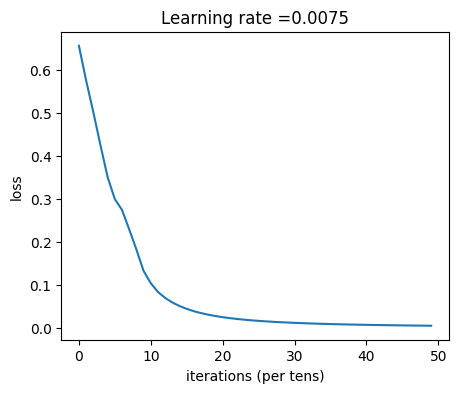

Accuracy: 0.74
MODIFYING BOTH:
LR: 0.002 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6793922074712064
Loss after iteration 200: 0.6545131850649426
Loss after iteration 300: 0.6483922911056792
Loss after iteration 400: 0.6458730105738948
Loss after iteration 500: 0.6430460862361034
Loss after iteration 600: 0.6396401760247721
Loss after iteration 700: 0.6353568208013635
Loss after iteration 800: 0.6298539063864927
Loss after iteration 900: 0.622835890035067
Loss after iteration 1000: 0.6143571123278911
Loss after iteration 1100: 0.6046619388916961
Loss after iteration 1200: 0.5939726224493859
Loss after iteration 1300: 0.5828533507626565
Loss after iteration 1400: 0.5714839554411514
Loss after iteration 1500: 0.559757248785034
Loss after iteration 1600: 0.5478408607064437
Loss after iteration 1700: 0.5361803609110319
Loss after iteration 1800: 0.5244585208447946
Loss after iteration 1900: 0.5127667442096155
Loss after iteration 2000: 0.5008700565802491


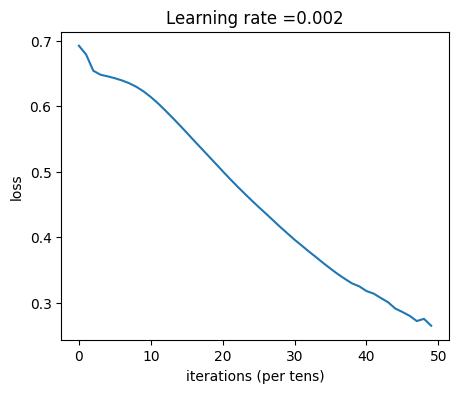

Accuracy: 0.6000000000000001
LR: 0.002 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6806481511159297
Loss after iteration 200: 0.6549428002394841
Loss after iteration 300: 0.647612299450255
Loss after iteration 400: 0.644870805872567
Loss after iteration 500: 0.6417588937767634
Loss after iteration 600: 0.6379170177395056
Loss after iteration 700: 0.6330176064753811
Loss after iteration 800: 0.626728403406405
Loss after iteration 900: 0.6188261960676366
Loss after iteration 1000: 0.6094831788885683
Loss after iteration 1100: 0.598816655874995
Loss after iteration 1200: 0.5869314291348849
Loss after iteration 1300: 0.5745925161570766
Loss after iteration 1400: 0.5618287075021221
Loss after iteration 1500: 0.5485884529611662
Loss after iteration 1600: 0.5345892612350864
Loss after iteration 1700: 0.5197258062172682
Loss after iteration 1800: 0.5041696681423509
Loss after iteration 1900: 0.4881811685057299
Loss after iteration 2000: 0.47186165308173206
Los

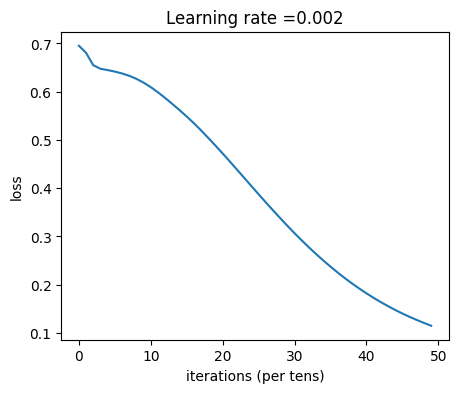

Accuracy: 0.7000000000000001
LR: 0.002 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.6595096501225097
Loss after iteration 200: 0.6496949894518095
Loss after iteration 300: 0.6469383078896652
Loss after iteration 400: 0.6440060060762123
Loss after iteration 500: 0.6405115363279356
Loss after iteration 600: 0.6361305249523285
Loss after iteration 700: 0.6305154445673412
Loss after iteration 800: 0.6234097546700684
Loss after iteration 900: 0.6146282513446435
Loss after iteration 1000: 0.6041977593453373
Loss after iteration 1100: 0.5929909966299118
Loss after iteration 1200: 0.580930535456812
Loss after iteration 1300: 0.5684224836548826
Loss after iteration 1400: 0.5554846661756901
Loss after iteration 1500: 0.5417334531371194
Loss after iteration 1600: 0.5269650662182734
Loss after iteration 1700: 0.5114395976627611
Loss after iteration 1800: 0.495182890434957
Loss after iteration 1900: 0.4784132613886077
Loss after iteration 2000: 0.4612341588606594
Lo

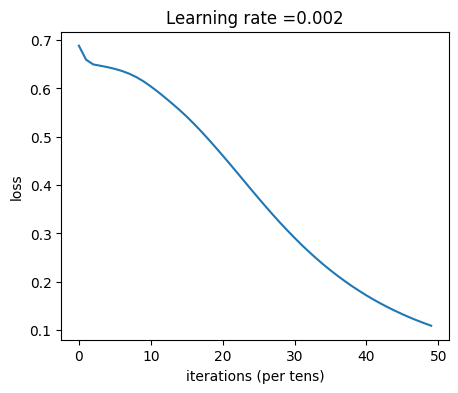

Accuracy: 0.74
LR: 0.002 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.6637277792550198
Loss after iteration 200: 0.6501862177851492
Loss after iteration 300: 0.647170336323426
Loss after iteration 400: 0.6441578890676308
Loss after iteration 500: 0.64059544863247
Loss after iteration 600: 0.6361732610482804
Loss after iteration 700: 0.6305456409799058
Loss after iteration 800: 0.6234410186783579
Loss after iteration 900: 0.6146134796662412
Loss after iteration 1000: 0.6041078695976803
Loss after iteration 1100: 0.592130421544513
Loss after iteration 1200: 0.5791436366470392
Loss after iteration 1300: 0.565362898624131
Loss after iteration 1400: 0.5509266370645951
Loss after iteration 1500: 0.5356667158784816
Loss after iteration 1600: 0.5197707270279243
Loss after iteration 1700: 0.503304308661475
Loss after iteration 1800: 0.4862855148257982
Loss after iteration 1900: 0.46888807201912475
Loss after iteration 2000: 0.45122584372613045
Loss after iterat

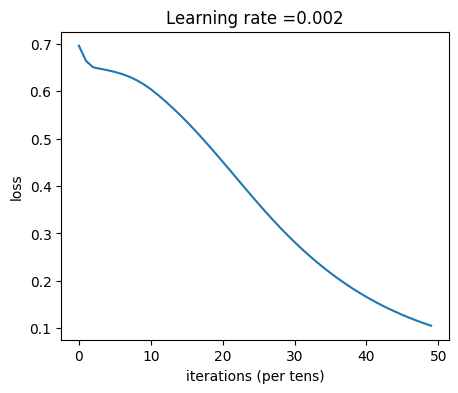

Accuracy: 0.72
LR: 0.002 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.6560591447376845
Loss after iteration 200: 0.6481231344568064
Loss after iteration 300: 0.644527410097592
Loss after iteration 400: 0.6404982253375275
Loss after iteration 500: 0.6356761179638882
Loss after iteration 600: 0.6298536966725905
Loss after iteration 700: 0.6227210598447943
Loss after iteration 800: 0.6139849935723939
Loss after iteration 900: 0.6036502049440646
Loss after iteration 1000: 0.5920168476816484
Loss after iteration 1100: 0.579301093033513
Loss after iteration 1200: 0.5657386680864374
Loss after iteration 1300: 0.5513104122992152
Loss after iteration 1400: 0.5363377446927728
Loss after iteration 1500: 0.520819690531103
Loss after iteration 1600: 0.5046248445619111
Loss after iteration 1700: 0.48783320711113554
Loss after iteration 1800: 0.47049577897145445
Loss after iteration 1900: 0.45275495979160274
Loss after iteration 2000: 0.43473395745195614
Loss after i

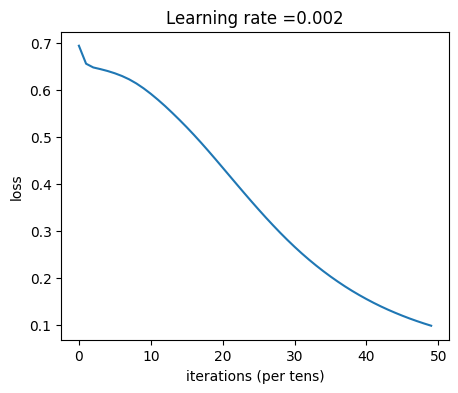

Accuracy: 0.74
LR: 0.002 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.6471131711163522
Loss after iteration 200: 0.6412368218380476
Loss after iteration 300: 0.6358045910369327
Loss after iteration 400: 0.6292955879640486
Loss after iteration 500: 0.6214328387891511
Loss after iteration 600: 0.6119458709005947
Loss after iteration 700: 0.6008678640084203
Loss after iteration 800: 0.5882693100355479
Loss after iteration 900: 0.5743162287577299
Loss after iteration 1000: 0.5595523833440145
Loss after iteration 1100: 0.5439741124317661
Loss after iteration 1200: 0.5277115206677453
Loss after iteration 1300: 0.5108277423773796
Loss after iteration 1400: 0.49342684463655756
Loss after iteration 1500: 0.4755685664730662
Loss after iteration 1600: 0.4573786235735914
Loss after iteration 1700: 0.4390210194821661
Loss after iteration 1800: 0.42055063553117045
Loss after iteration 1900: 0.40208494677424766
Loss after iteration 2000: 0.38373661213138766
Loss aft

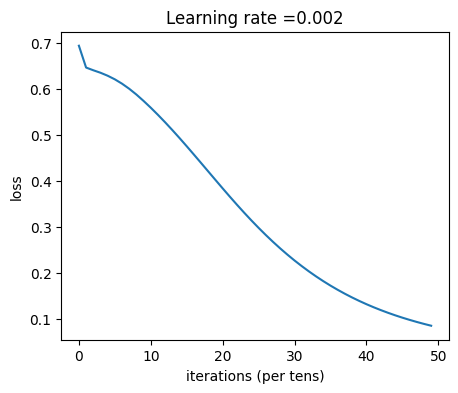

Accuracy: 0.72
LR: 0.002 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.6460594960680786
Loss after iteration 200: 0.6395649159884733
Loss after iteration 300: 0.6324058268497547
Loss after iteration 400: 0.62414208101657
Loss after iteration 500: 0.6144850109294191
Loss after iteration 600: 0.6031691622673434
Loss after iteration 700: 0.5903295299281907
Loss after iteration 800: 0.576247404911925
Loss after iteration 900: 0.5610666786465318
Loss after iteration 1000: 0.5448603577304294
Loss after iteration 1100: 0.5279182704403854
Loss after iteration 1200: 0.5103920554402419
Loss after iteration 1300: 0.4923500360866372
Loss after iteration 1400: 0.4738684350127394
Loss after iteration 1500: 0.4551071487081303
Loss after iteration 1600: 0.43611175390596263
Loss after iteration 1700: 0.41703948450714645
Loss after iteration 1800: 0.39809760695887886
Loss after iteration 1900: 0.37936508072525627
Loss after iteration 2000: 0.36097873731061797
Loss after

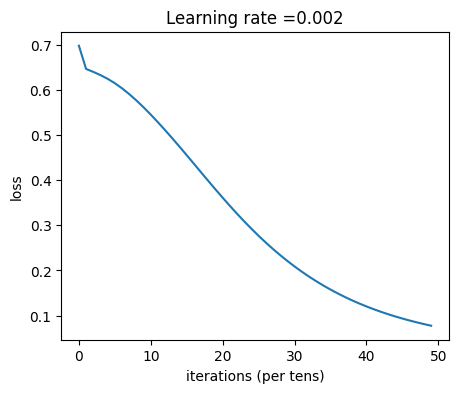

Accuracy: 0.74
LR: 0.002 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.6407145453243441
Loss after iteration 200: 0.6293693658360248
Loss after iteration 300: 0.617544887427689
Loss after iteration 400: 0.6047798404436185
Loss after iteration 500: 0.5908267517227952
Loss after iteration 600: 0.5757823933637566
Loss after iteration 700: 0.5597141039331507
Loss after iteration 800: 0.5429315886572897
Loss after iteration 900: 0.5254825573904033
Loss after iteration 1000: 0.507480149912464
Loss after iteration 1100: 0.4890415936782501
Loss after iteration 1200: 0.4701574685418742
Loss after iteration 1300: 0.4509753258277459
Loss after iteration 1400: 0.4316745431522531
Loss after iteration 1500: 0.4123044737425644
Loss after iteration 1600: 0.39309415182401797
Loss after iteration 1700: 0.3741614447956845
Loss after iteration 1800: 0.35556021288292616
Loss after iteration 1900: 0.33735806227084675
Loss after iteration 2000: 0.3196941171137017
Loss after 

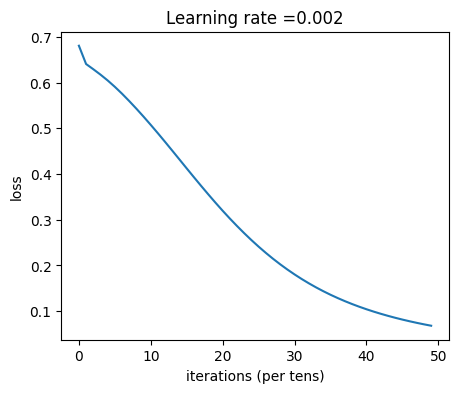

Accuracy: 0.72
LR: 0.002 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.6273828144752882
Loss after iteration 200: 0.6088727728805079
Loss after iteration 300: 0.5906402024124303
Loss after iteration 400: 0.5720788524177542
Loss after iteration 500: 0.5529996191918323
Loss after iteration 600: 0.5333764448769257
Loss after iteration 700: 0.5132373625124419
Loss after iteration 800: 0.49273856452659986
Loss after iteration 900: 0.47213805543019516
Loss after iteration 1000: 0.4514341997656628
Loss after iteration 1100: 0.4306593962623893
Loss after iteration 1200: 0.4100358568234869
Loss after iteration 1300: 0.38979272099431556
Loss after iteration 1400: 0.36994305111162873
Loss after iteration 1500: 0.35059121785659625
Loss after iteration 1600: 0.3318417238638983
Loss after iteration 1700: 0.31374671752358596
Loss after iteration 1800: 0.2963662875998125
Loss after iteration 1900: 0.27970704795387813
Loss after iteration 2000: 0.263827307747635
Loss 

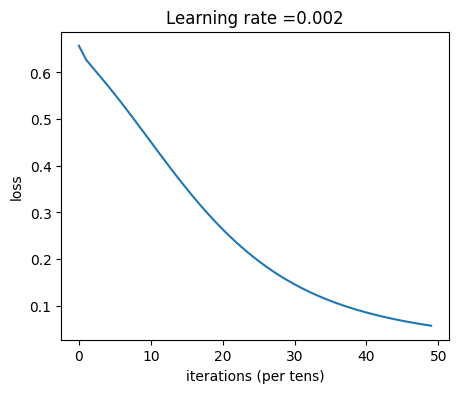

Accuracy: 0.74
LR: 0.004 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6545855749416614
Loss after iteration 200: 0.6458951659377714
Loss after iteration 300: 0.6396833095794584
Loss after iteration 400: 0.629939427311197
Loss after iteration 500: 0.6144962212148161
Loss after iteration 600: 0.5941587806067979
Loss after iteration 700: 0.5717002989338765
Loss after iteration 800: 0.5480502101955892
Loss after iteration 900: 0.524705434765946
Loss after iteration 1000: 0.5011025073853902
Loss after iteration 1100: 0.4783570355350272
Loss after iteration 1200: 0.45804091604903124
Loss after iteration 1300: 0.4376590764315826
Loss after iteration 1400: 0.41854374738456435
Loss after iteration 1500: 0.3996663508285065
Loss after iteration 1600: 0.3803555231378875
Loss after iteration 1700: 0.36506243985765985
Loss after iteration 1800: 0.3498683325015669
Loss after iteration 1900: 0.3354579994563986
Loss after iteration 2000: 0.3200793483415564
Loss after it

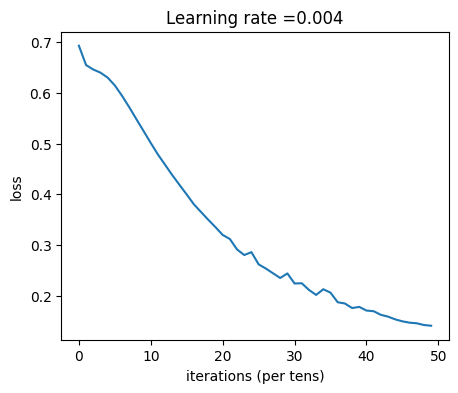

Accuracy: 0.6400000000000001
LR: 0.004 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6550370634568958
Loss after iteration 200: 0.6448962767412726
Loss after iteration 300: 0.637966439649159
Loss after iteration 400: 0.6268242554025676
Loss after iteration 500: 0.6096298275683276
Loss after iteration 600: 0.5871222826451283
Loss after iteration 700: 0.5620522319971729
Loss after iteration 800: 0.5348777772409392
Loss after iteration 900: 0.5046710358482212
Loss after iteration 1000: 0.4726317750819508
Loss after iteration 1100: 0.43921823134641086
Loss after iteration 1200: 0.4053728550110952
Loss after iteration 1300: 0.3717479796965405
Loss after iteration 1400: 0.3390654514720467
Loss after iteration 1500: 0.30774822724614803
Loss after iteration 1600: 0.2784929728598268
Loss after iteration 1700: 0.25126544384403476
Loss after iteration 1800: 0.22607204835855893
Loss after iteration 1900: 0.2033650119597225
Loss after iteration 2000: 0.18267444881564

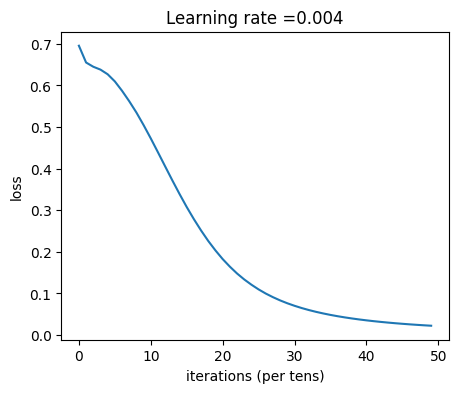

Accuracy: 0.7000000000000001
LR: 0.004 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.6496972304760718
Loss after iteration 200: 0.6440194791037297
Loss after iteration 300: 0.6361616760063266
Loss after iteration 400: 0.6234727162563145
Loss after iteration 500: 0.6042951604761876
Loss after iteration 600: 0.5810509614981694
Loss after iteration 700: 0.5556179219758692
Loss after iteration 800: 0.527133676026988
Loss after iteration 900: 0.49539494224168534
Loss after iteration 1000: 0.4614982324977135
Loss after iteration 1100: 0.4263890092592911
Loss after iteration 1200: 0.390670109681428
Loss after iteration 1300: 0.35583007173330206
Loss after iteration 1400: 0.3224267293782576
Loss after iteration 1500: 0.29150295561455447
Loss after iteration 1600: 0.2628425107440672
Loss after iteration 1700: 0.2364040063634363
Loss after iteration 1800: 0.21319053150720502
Loss after iteration 1900: 0.19195699550907683
Loss after iteration 2000: 0.17243374498246

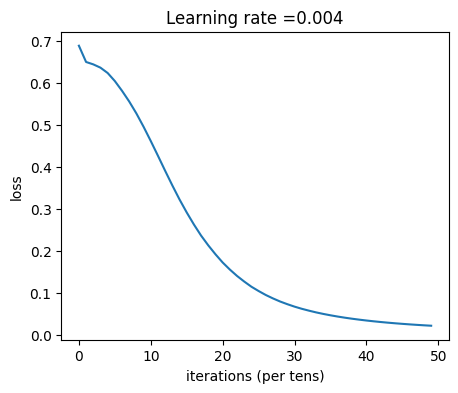

Accuracy: 0.74
LR: 0.004 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.6501902329323282
Loss after iteration 200: 0.644173731537469
Loss after iteration 300: 0.63620532311691
Loss after iteration 400: 0.6235082729601927
Loss after iteration 500: 0.6042159846456133
Loss after iteration 600: 0.5792923851535926
Loss after iteration 700: 0.5510987191608759
Loss after iteration 800: 0.5199575449783661
Loss after iteration 900: 0.48649987070837564
Loss after iteration 1000: 0.4514706511991534
Loss after iteration 1100: 0.4156771680432772
Loss after iteration 1200: 0.3799077067259268
Loss after iteration 1300: 0.3452138705788907
Loss after iteration 1400: 0.3127452731972518
Loss after iteration 1500: 0.2821258011850386
Loss after iteration 1600: 0.2540349663921516
Loss after iteration 1700: 0.2287003855852667
Loss after iteration 1800: 0.20544982923745805
Loss after iteration 1900: 0.18516477973938505
Loss after iteration 2000: 0.16628047744152624
Loss after i

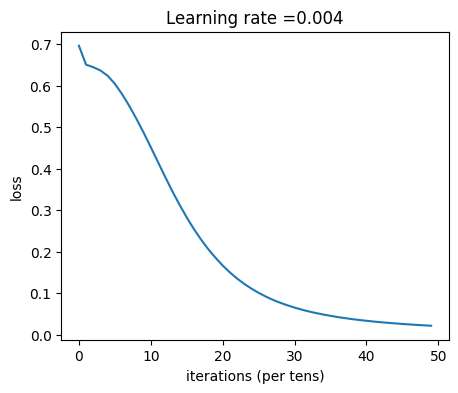

Accuracy: 0.7000000000000001
LR: 0.004 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.6481068867800278
Loss after iteration 200: 0.6405107061523866
Loss after iteration 300: 0.6298850395058224
Loss after iteration 400: 0.6140256633624416
Loss after iteration 500: 0.5921023659132726
Loss after iteration 600: 0.5658514944862894
Loss after iteration 700: 0.5364877028848303
Loss after iteration 800: 0.5047942156021005
Loss after iteration 900: 0.47069222343769324
Loss after iteration 1000: 0.43494514167190423
Loss after iteration 1100: 0.39877868669862326
Loss after iteration 1200: 0.3631657570269072
Loss after iteration 1300: 0.3288533000971944
Loss after iteration 1400: 0.29643556379379504
Loss after iteration 1500: 0.2664278657710218
Loss after iteration 1600: 0.2393302937728941
Loss after iteration 1700: 0.2145560190305738
Loss after iteration 1800: 0.192637006572423
Loss after iteration 1900: 0.17269242680248412
Loss after iteration 2000: 0.155111737029

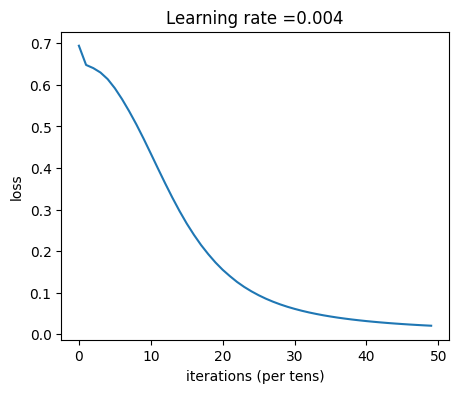

Accuracy: 0.7
LR: 0.004 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.6412541541453748
Loss after iteration 200: 0.6293362851531226
Loss after iteration 300: 0.6120211835845871
Loss after iteration 400: 0.5883777992001845
Loss after iteration 500: 0.5596923999746402
Loss after iteration 600: 0.5278779341405876
Loss after iteration 700: 0.4936159848976472
Loss after iteration 800: 0.457580370333536
Loss after iteration 900: 0.4207665806075464
Loss after iteration 1000: 0.38396310961777497
Loss after iteration 1100: 0.3481169687466453
Loss after iteration 1200: 0.3140623296654106
Loss after iteration 1300: 0.28236330883640937
Loss after iteration 1400: 0.2532211861978109
Loss after iteration 1500: 0.22674419675750085
Loss after iteration 1600: 0.20305371421812218
Loss after iteration 1700: 0.1817234766782301
Loss after iteration 1800: 0.16286723429377808
Loss after iteration 1900: 0.1462462119967209
Loss after iteration 2000: 0.1314891546359709
Loss afte

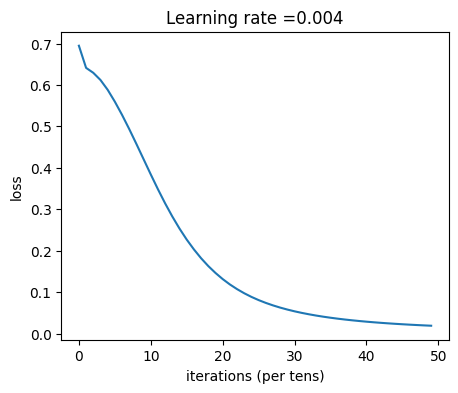

Accuracy: 0.74
LR: 0.004 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.6395813640506509
Loss after iteration 200: 0.6241893790552302
Loss after iteration 300: 0.6032577704838454
Loss after iteration 400: 0.576373439588304
Loss after iteration 500: 0.5450092009257307
Loss after iteration 600: 0.5105674591585315
Loss after iteration 700: 0.4740622922014286
Loss after iteration 800: 0.43631386845544573
Loss after iteration 900: 0.3982924452215236
Loss after iteration 1000: 0.36117798317118527
Loss after iteration 1100: 0.32568694629605
Loss after iteration 1200: 0.29247773119115233
Loss after iteration 1300: 0.2619060589650941
Loss after iteration 1400: 0.23406060977604753
Loss after iteration 1500: 0.2090276850123937
Loss after iteration 1600: 0.18669936932085326
Loss after iteration 1700: 0.16689484551963893
Loss after iteration 1800: 0.14928245510868632
Loss after iteration 1900: 0.1338928125238758
Loss after iteration 2000: 0.12045833500054927
Loss af

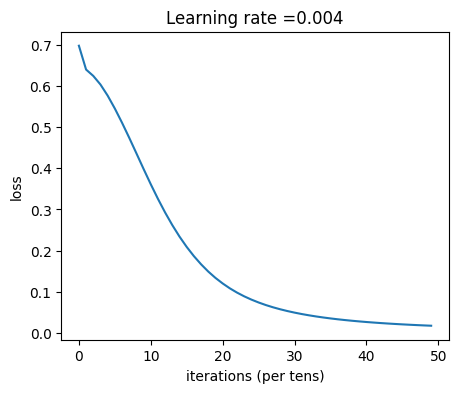

Accuracy: 0.74
LR: 0.004 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.6293892538807038
Loss after iteration 200: 0.6048396085062749
Loss after iteration 300: 0.575889019665289
Loss after iteration 400: 0.5430866505783252
Loss after iteration 500: 0.507640929691311
Loss after iteration 600: 0.47029387433066616
Loss after iteration 700: 0.4317582413156424
Loss after iteration 800: 0.39318802948824366
Loss after iteration 900: 0.35567033325065395
Loss after iteration 1000: 0.31981169226157646
Loss after iteration 1100: 0.28639363444241595
Loss after iteration 1200: 0.25562739639839316
Loss after iteration 1300: 0.22771671249759579
Loss after iteration 1400: 0.20273757822213717
Loss after iteration 1500: 0.18058540686206917
Loss after iteration 1600: 0.16099395786094547
Loss after iteration 1700: 0.1438098454993137
Loss after iteration 1800: 0.1288576559117864
Loss after iteration 1900: 0.11576896533796911
Loss after iteration 2000: 0.10429269674380696
Lo

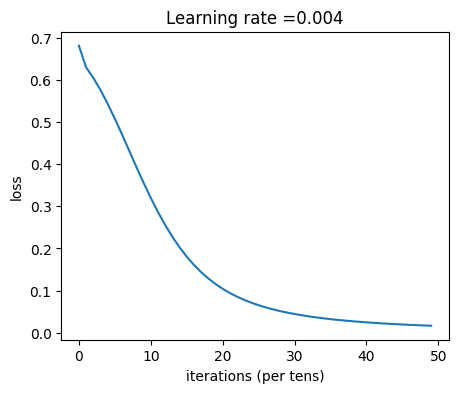

Accuracy: 0.72
LR: 0.004 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.608878336230701
Loss after iteration 200: 0.5721125252977545
Loss after iteration 300: 0.5334279999233404
Loss after iteration 400: 0.4927930591620858
Loss after iteration 500: 0.4515037744533247
Loss after iteration 600: 0.4101301735953513
Loss after iteration 700: 0.3700338144184177
Loss after iteration 800: 0.33191852392970084
Loss after iteration 900: 0.2964563902225575
Loss after iteration 1000: 0.26389137050593703
Loss after iteration 1100: 0.2344636075393941
Loss after iteration 1200: 0.20808608344724425
Loss after iteration 1300: 0.1846407366665905
Loss after iteration 1400: 0.16404627257873491
Loss after iteration 1500: 0.14604039396665527
Loss after iteration 1600: 0.13031925048694182
Loss after iteration 1700: 0.11669034359459357
Loss after iteration 1800: 0.10485725567601674
Loss after iteration 1900: 0.09458418208814727
Loss after iteration 2000: 0.08561709305350801
Lo

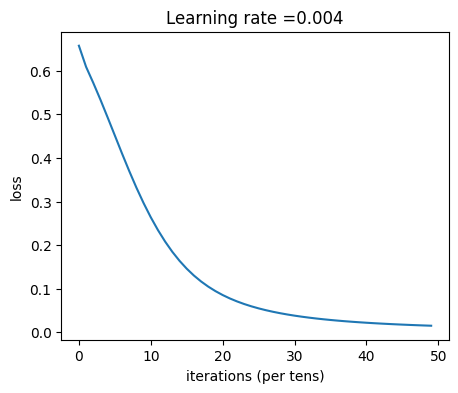

Accuracy: 0.72
LR: 0.008 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6459381687341179
Loss after iteration 200: 0.6301027538382019
Loss after iteration 300: 0.5945204845760634
Loss after iteration 400: 0.5484857832070421
Loss after iteration 500: 0.5021390826407638
Loss after iteration 600: 0.4591839693979565
Loss after iteration 700: 0.4378568893574863
Loss after iteration 800: 0.40653589428566517
Loss after iteration 900: 0.3681725033222591
Loss after iteration 1000: 0.34471221063113555
Loss after iteration 1100: 0.3119327306112984
Loss after iteration 1200: 0.30296352205888366
Loss after iteration 1300: 0.2913555131661363
Loss after iteration 1400: 0.2735655695313311
Loss after iteration 1500: 0.2423234450899259
Loss after iteration 1600: 0.2419089797090426
Loss after iteration 1700: 0.21022480694264567
Loss after iteration 1800: 0.19881400511309738
Loss after iteration 1900: 0.1872477164111376
Loss after iteration 2000: 0.18189714562057085
Loss aft

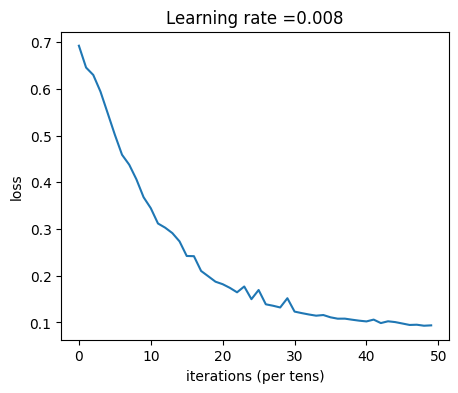

Accuracy: 0.7000000000000001
LR: 0.008 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6449481411813672
Loss after iteration 200: 0.6270175202701503
Loss after iteration 300: 0.5875167186256026
Loss after iteration 400: 0.535423539403739
Loss after iteration 500: 0.473355487196018
Loss after iteration 600: 0.4081662325693684
Loss after iteration 700: 0.41169205940829484
Loss after iteration 800: 0.37708425435580806
Loss after iteration 900: 0.34239693855216785
Loss after iteration 1000: 0.3087341022320854
Loss after iteration 1100: 0.28097321321496793
Loss after iteration 1200: 0.2884967115965065
Loss after iteration 1300: 0.3186288852234996
Loss after iteration 1400: 0.1283162296338948
Loss after iteration 1500: 0.10165074012629101
Loss after iteration 1600: 0.08452491286465874
Loss after iteration 1700: 0.0715214789977075
Loss after iteration 1800: 0.061218774499559
Loss after iteration 1900: 0.052766353672160524
Loss after iteration 2000: 0.046124359599

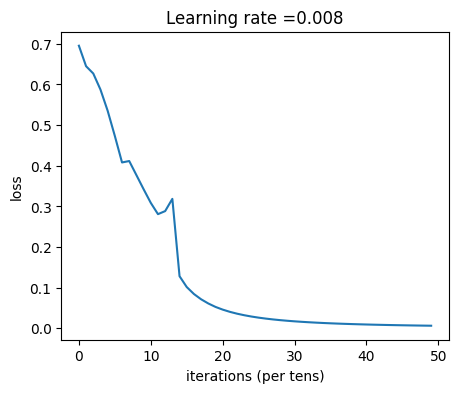

Accuracy: 0.72
LR: 0.008 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.6440465223232272
Loss after iteration 200: 0.6235968767332107
Loss after iteration 300: 0.5812830657728822
Loss after iteration 400: 0.5275435650118109
Loss after iteration 500: 0.46242390826202223
Loss after iteration 600: 0.39619715018691076
Loss after iteration 700: 0.38752995157254744
Loss after iteration 800: 0.3571111360287316
Loss after iteration 900: 0.319390988916533
Loss after iteration 1000: 0.264356493721982
Loss after iteration 1100: 0.24115357917749572
Loss after iteration 1200: 0.17067236372425987
Loss after iteration 1300: 0.14402951049472978
Loss after iteration 1400: 0.10327604602631232
Loss after iteration 1500: 0.08782915621139283
Loss after iteration 1600: 0.075146331039073
Loss after iteration 1700: 0.0634040048579652
Loss after iteration 1800: 0.053981299861758904
Loss after iteration 1900: 0.04695202790298793
Loss after iteration 2000: 0.041239486708920754
Loss

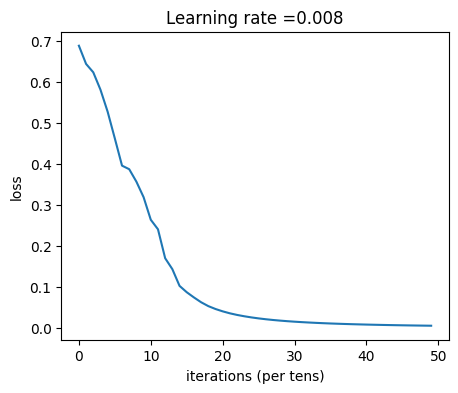

Accuracy: 0.76
LR: 0.008 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.6442068866673165
Loss after iteration 200: 0.6236489334057144
Loss after iteration 300: 0.579597828906286
Loss after iteration 400: 0.5204372440326833
Loss after iteration 500: 0.4521042603156317
Loss after iteration 600: 0.3859535994052998
Loss after iteration 700: 0.36450746872942563
Loss after iteration 800: 0.3336625404910599
Loss after iteration 900: 0.2957509605486069
Loss after iteration 1000: 0.26316999167667626
Loss after iteration 1100: 0.18515010218097633
Loss after iteration 1200: 0.14380906079198025
Loss after iteration 1300: 0.11417046061754982
Loss after iteration 1400: 0.09783794749355658
Loss after iteration 1500: 0.08280723932939033
Loss after iteration 1600: 0.07039436398334407
Loss after iteration 1700: 0.05712708993246358
Loss after iteration 1800: 0.048889204005374436
Loss after iteration 1900: 0.042697165621889306
Loss after iteration 2000: 0.03772755715472866


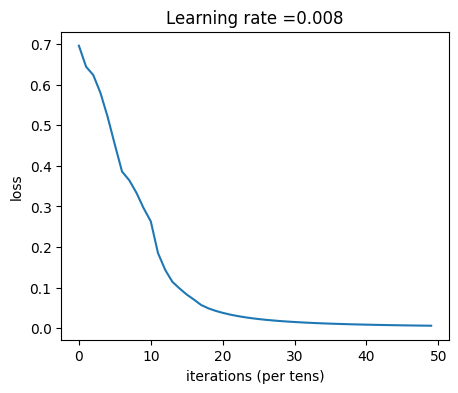

Accuracy: 0.74
LR: 0.008 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.6405520053276235
Loss after iteration 200: 0.6141686442613083
Loss after iteration 300: 0.5661085572933194
Loss after iteration 400: 0.5051914430133925
Loss after iteration 500: 0.43608897439878563
Loss after iteration 600: 0.3721792633820871
Loss after iteration 700: 0.35423760025674894
Loss after iteration 800: 0.3217171168037606
Loss after iteration 900: 0.2922730718601854
Loss after iteration 1000: 0.23230127754911561
Loss after iteration 1100: 0.18370656625507006
Loss after iteration 1200: 0.13996666653779696
Loss after iteration 1300: 0.12063742036339144
Loss after iteration 1400: 0.0896638499484975
Loss after iteration 1500: 0.07152543874317026
Loss after iteration 1600: 0.06072219074952608
Loss after iteration 1700: 0.05219742470309452
Loss after iteration 1800: 0.04524374477248228
Loss after iteration 1900: 0.03993226740189965
Loss after iteration 2000: 0.03525504813486147
L

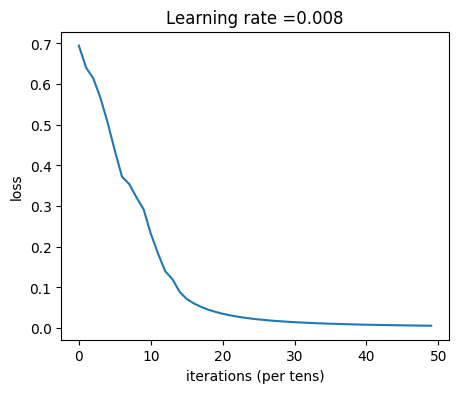

Accuracy: 0.72
LR: 0.008 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.6294597261727939
Loss after iteration 200: 0.5886859659300268
Loss after iteration 300: 0.5283444511200727
Loss after iteration 400: 0.4581516845112491
Loss after iteration 500: 0.3855505071805445
Loss after iteration 600: 0.3650645967357851
Loss after iteration 700: 0.33762328874311787
Loss after iteration 800: 0.29405690688617014
Loss after iteration 900: 0.25027299384688145
Loss after iteration 1000: 0.2017726982728407
Loss after iteration 1100: 0.14801304427241244
Loss after iteration 1200: 0.12460766987088993
Loss after iteration 1300: 0.09905014451040632
Loss after iteration 1400: 0.07411696085438256
Loss after iteration 1500: 0.0628667892441772
Loss after iteration 1600: 0.053459070424317155
Loss after iteration 1700: 0.04610969006228069
Loss after iteration 1800: 0.040457865902337464
Loss after iteration 1900: 0.035767376585233095
Loss after iteration 2000: 0.031850769428941

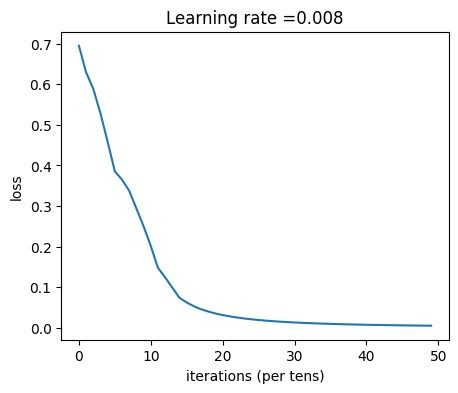

Accuracy: 0.74
LR: 0.008 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.6242810088365097
Loss after iteration 200: 0.5766778199995745
Loss after iteration 300: 0.5109298169552263
Loss after iteration 400: 0.43678160161798
Loss after iteration 500: 0.3633350675502589
Loss after iteration 600: 0.34427760137966007
Loss after iteration 700: 0.3114347217896006
Loss after iteration 800: 0.2674861868511254
Loss after iteration 900: 0.2209717829436082
Loss after iteration 1000: 0.1663529516772448
Loss after iteration 1100: 0.1193412917658363
Loss after iteration 1200: 0.0947502293227756
Loss after iteration 1300: 0.0770152431351671
Loss after iteration 1400: 0.06418365261621402
Loss after iteration 1500: 0.05474710468887067
Loss after iteration 1600: 0.04723574696002251
Loss after iteration 1700: 0.04116207314073795
Loss after iteration 1800: 0.03622161084240351
Loss after iteration 1900: 0.032137663771106474
Loss after iteration 2000: 0.028769085019336768
Loss

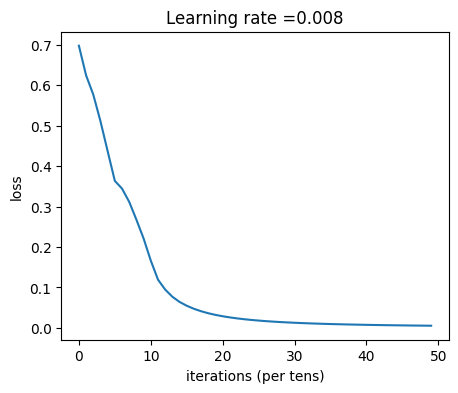

Accuracy: 0.78
LR: 0.008 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.6049213968113129
Loss after iteration 200: 0.5432452411541793
Loss after iteration 300: 0.4704579654921505
Loss after iteration 400: 0.3935824953847182
Loss after iteration 500: 0.3282070452375881
Loss after iteration 600: 0.3134524411398795
Loss after iteration 700: 0.2689219690510309
Loss after iteration 800: 0.22186248348766685
Loss after iteration 900: 0.16866534357748414
Loss after iteration 1000: 0.1215697211550677
Loss after iteration 1100: 0.09729300383733391
Loss after iteration 1200: 0.07730652190935887
Loss after iteration 1300: 0.06429608304866057
Loss after iteration 1400: 0.05429726169008451
Loss after iteration 1500: 0.04682520264507517
Loss after iteration 1600: 0.040721096759517045
Loss after iteration 1700: 0.03579885966613472
Loss after iteration 1800: 0.031768370842674136
Loss after iteration 1900: 0.028419150483612127
Loss after iteration 2000: 0.025609174220409

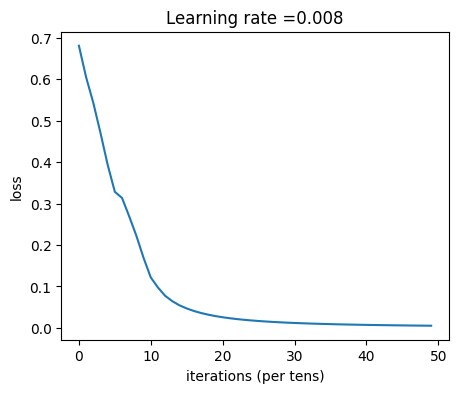

Accuracy: 0.74
LR: 0.008 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.5721674566546789
Loss after iteration 200: 0.49292983158574344
Loss after iteration 300: 0.41034032443727086
Loss after iteration 400: 0.336045808360248
Loss after iteration 500: 0.31132955951984975
Loss after iteration 600: 0.267414541324869
Loss after iteration 700: 0.21412232829180392
Loss after iteration 800: 0.1594093133388472
Loss after iteration 900: 0.11977267882851741
Loss after iteration 1000: 0.0922394483671184
Loss after iteration 1100: 0.07508649772142723
Loss after iteration 1200: 0.062375345998023926
Loss after iteration 1300: 0.05292448673780822
Loss after iteration 1400: 0.045540172221958976
Loss after iteration 1500: 0.03962210765723535
Loss after iteration 1600: 0.034839020278292776
Loss after iteration 1700: 0.030905524115775133
Loss after iteration 1800: 0.02763415251990433
Loss after iteration 1900: 0.02489590813829815
Loss after iteration 2000: 0.022575877911

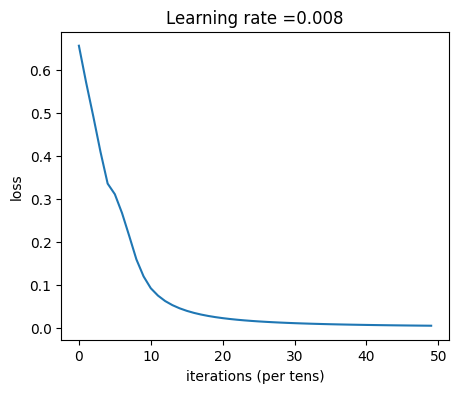

Accuracy: 0.74
LR: 0.016 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6304434376404138
Loss after iteration 200: 0.5494855114329137
Loss after iteration 300: 0.5037148420377878
Loss after iteration 400: 0.43947294680970933
Loss after iteration 500: 0.4047083617927545
Loss after iteration 600: 0.37036866372172883
Loss after iteration 700: 0.3252557027837096
Loss after iteration 800: 0.28899873259331177
Loss after iteration 900: 0.2336250426860078
Loss after iteration 1000: 0.21661969153828653
Loss after iteration 1100: 0.3535879156691805
Loss after iteration 1200: 0.17904564132056924
Loss after iteration 1300: 0.17057084612632525
Loss after iteration 1400: 0.1634521674753204
Loss after iteration 1500: 0.14643161338770805
Loss after iteration 1600: 0.14208281371174242
Loss after iteration 1700: 0.1305831148416201
Loss after iteration 1800: 0.11758840235881803
Loss after iteration 1900: 0.11231940057976787
Loss after iteration 2000: 0.10444077751572836
Los

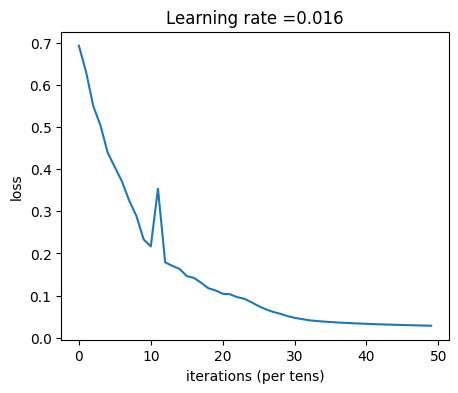

Accuracy: 0.68
LR: 0.016 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6273956980738415
Loss after iteration 200: 0.536656234411009
Loss after iteration 300: 0.5264698120660328
Loss after iteration 400: 0.4784783551838038
Loss after iteration 500: 0.45218891454833754
Loss after iteration 600: 0.3987488299682115
Loss after iteration 700: 0.3298664621828867
Loss after iteration 800: 0.21458098627338146
Loss after iteration 900: 0.4104153986676909
Loss after iteration 1000: 0.18107050469952246
Loss after iteration 1100: 0.3216786621328631
Loss after iteration 1200: 0.9557937867171281
Loss after iteration 1300: 0.06412517314800587
Loss after iteration 1400: 0.04216810705084546
Loss after iteration 1500: 0.030383578182983866
Loss after iteration 1600: 0.02455049622894581
Loss after iteration 1700: 0.020332452539370008
Loss after iteration 1800: 0.017215725675198506
Loss after iteration 1900: 0.014819988613637832
Loss after iteration 2000: 0.012945149088152122

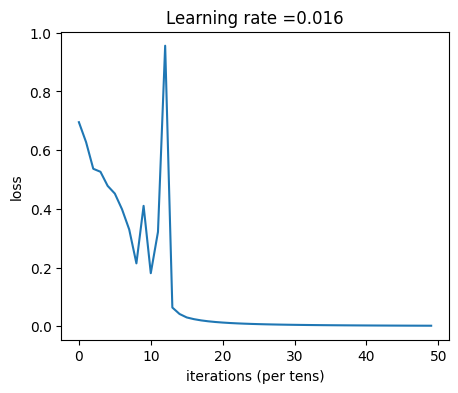

Accuracy: 0.76
LR: 0.016 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.623856562061414
Loss after iteration 200: 0.5295565752178748
Loss after iteration 300: 0.4924359128744117
Loss after iteration 400: 0.4414059206523039
Loss after iteration 500: 0.37881084234060775
Loss after iteration 600: 0.3166929929800948
Loss after iteration 700: 0.3304571060549843
Loss after iteration 800: 0.1365057011332529
Loss after iteration 900: 0.16718756719049266
Loss after iteration 1000: 0.07497409759529092
Loss after iteration 1100: 0.054647213012668824
Loss after iteration 1200: 0.041396745550479334
Loss after iteration 1300: 0.032701145918182545
Loss after iteration 1400: 0.026604264406267935
Loss after iteration 1500: 0.022295231635385902
Loss after iteration 1600: 0.018942155515363077
Loss after iteration 1700: 0.0163471244926044
Loss after iteration 1800: 0.014253538321159895
Loss after iteration 1900: 0.012618296811765595
Loss after iteration 2000: 0.0112577091999

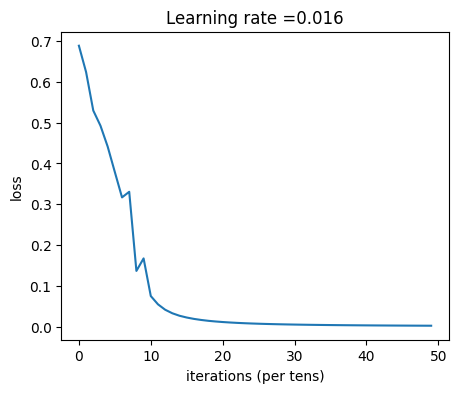

Accuracy: 0.76
LR: 0.016 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.6239448435666982
Loss after iteration 200: 0.5226480337145989
Loss after iteration 300: 0.49456558162782593
Loss after iteration 400: 0.4277788432892166
Loss after iteration 500: 0.37339958120017985
Loss after iteration 600: 0.2948311848325046
Loss after iteration 700: 0.2251866140859048
Loss after iteration 800: 0.28419217349442616
Loss after iteration 900: 0.10922595384802473
Loss after iteration 1000: 0.06444963863998324
Loss after iteration 1100: 0.046393439908990974
Loss after iteration 1200: 0.03578496092435324
Loss after iteration 1300: 0.028701821970097234
Loss after iteration 1400: 0.023521061952636306
Loss after iteration 1500: 0.019756867630573386
Loss after iteration 1600: 0.016893541473421324
Loss after iteration 1700: 0.014658938136775405
Loss after iteration 1800: 0.01287841153979292
Loss after iteration 1900: 0.011436670369354413
Loss after iteration 2000: 0.010244572

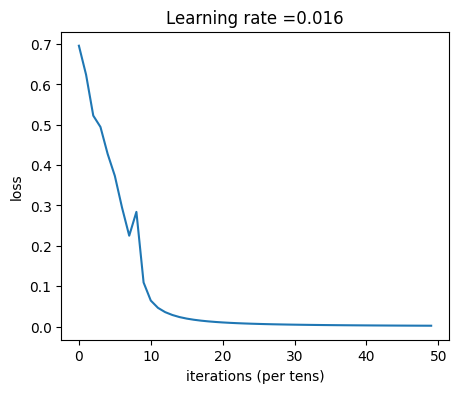

Accuracy: 0.74
LR: 0.016 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.6144413275090803
Loss after iteration 200: 0.5096616894352303
Loss after iteration 300: 0.4741142521930868
Loss after iteration 400: 0.40755020405566017
Loss after iteration 500: 0.3528653121801597
Loss after iteration 600: 0.2897361447458053
Loss after iteration 700: 0.23949820898665794
Loss after iteration 800: 0.11586406779755677
Loss after iteration 900: 0.12009386988845286
Loss after iteration 1000: 0.06588752084806095
Loss after iteration 1100: 0.04408220920245204
Loss after iteration 1200: 0.0336963384141023
Loss after iteration 1300: 0.027288620113660178
Loss after iteration 1400: 0.02267521779319688
Loss after iteration 1500: 0.019208242477939112
Loss after iteration 1600: 0.01656746219250443
Loss after iteration 1700: 0.01445201939606462
Loss after iteration 1800: 0.012751215797099584
Loss after iteration 1900: 0.011374645396755255
Loss after iteration 2000: 0.0102251565567

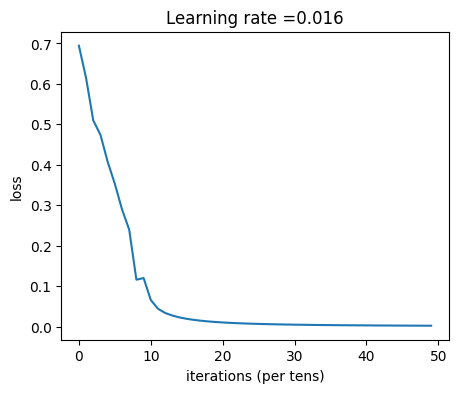

Accuracy: 0.72
LR: 0.016 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.589303853239635
Loss after iteration 200: 0.5065197336684998
Loss after iteration 300: 0.4515795546013449
Loss after iteration 400: 0.39011871949057797
Loss after iteration 500: 0.32309047060489016
Loss after iteration 600: 0.2374695701071277
Loss after iteration 700: 0.18945249260456962
Loss after iteration 800: 0.11430484436215978
Loss after iteration 900: 0.06691684992725663
Loss after iteration 1000: 0.04710875772164858
Loss after iteration 1100: 0.03438521786305885
Loss after iteration 1200: 0.027338728015474906
Loss after iteration 1300: 0.022365355772229884
Loss after iteration 1400: 0.018795736867459643
Loss after iteration 1500: 0.016077340705447345
Loss after iteration 1600: 0.013970306256601226
Loss after iteration 1700: 0.01227002385642105
Loss after iteration 1800: 0.01090244903164455
Loss after iteration 1900: 0.00978155062720893
Loss after iteration 2000: 0.0088427944

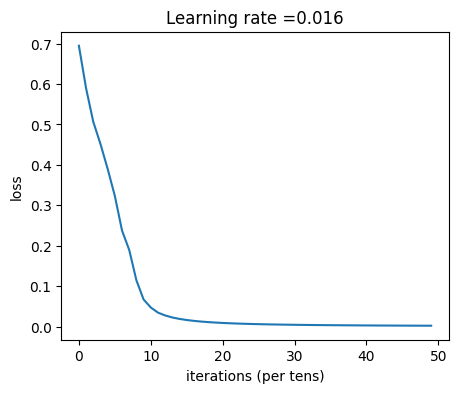

Accuracy: 0.78
LR: 0.016 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.577135093323471
Loss after iteration 200: 0.4961279953283047
Loss after iteration 300: 0.42861927523801296
Loss after iteration 400: 0.35525075533080147
Loss after iteration 500: 0.2825252565614773
Loss after iteration 600: 0.20137928065050137
Loss after iteration 700: 0.13468751685139171
Loss after iteration 800: 0.08285867651274303
Loss after iteration 900: 0.05289248429308888
Loss after iteration 1000: 0.03740021049967861
Loss after iteration 1100: 0.02949975441278794
Loss after iteration 1200: 0.02392810921392354
Loss after iteration 1300: 0.019946928630812745
Loss after iteration 1400: 0.016939027428826782
Loss after iteration 1500: 0.014638527848995869
Loss after iteration 1600: 0.01281381051189091
Loss after iteration 1700: 0.011345473694940416
Loss after iteration 1800: 0.010141653444109886
Loss after iteration 1900: 0.009144141942842405
Loss after iteration 2000: 0.00830603

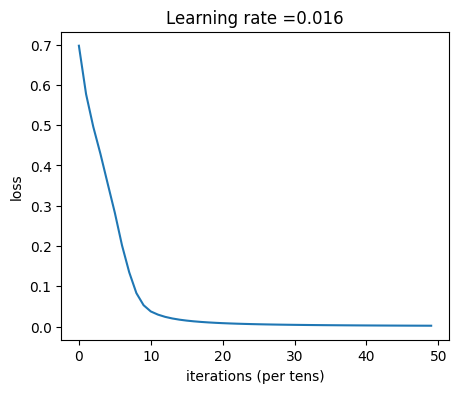

Accuracy: 0.76
LR: 0.016 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.5436178454015644
Loss after iteration 200: 0.47313036447097756
Loss after iteration 300: 0.3926928027423017
Loss after iteration 400: 0.31302242880928105
Loss after iteration 500: 0.23669279062676066
Loss after iteration 600: 0.14229786308855757
Loss after iteration 700: 0.08585333377460869
Loss after iteration 800: 0.05623695927636409
Loss after iteration 900: 0.040257051245320356
Loss after iteration 1000: 0.030848540099494396
Loss after iteration 1100: 0.024903338007345722
Loss after iteration 1200: 0.020575629567650935
Loss after iteration 1300: 0.017436020337269494
Loss after iteration 1400: 0.014979038925786014
Loss after iteration 1500: 0.013084188662312432
Loss after iteration 1600: 0.011557401018882363
Loss after iteration 1700: 0.010315581355514851
Loss after iteration 1800: 0.009280027914985774
Loss after iteration 1900: 0.008420456292484632
Loss after iteration 2000: 0.0

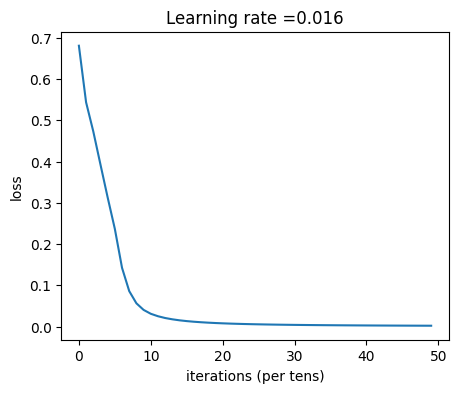

Accuracy: 0.76
LR: 0.016 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.4950243077634058
Loss after iteration 200: 0.44175404640138727
Loss after iteration 300: 0.3524539412214252
Loss after iteration 400: 0.26272262987758
Loss after iteration 500: 0.17485254379195428
Loss after iteration 600: 0.0993826724881196
Loss after iteration 700: 0.06380160874566804
Loss after iteration 800: 0.04324580140714639
Loss after iteration 900: 0.03296493495812174
Loss after iteration 1000: 0.026288790289045193
Loss after iteration 1100: 0.021647165349043027
Loss after iteration 1200: 0.0181932797770718
Loss after iteration 1300: 0.015559544617213407
Loss after iteration 1400: 0.013526720922638819
Loss after iteration 1500: 0.011908979457261902
Loss after iteration 1600: 0.010597768272734353
Loss after iteration 1700: 0.009515989125160374
Loss after iteration 1800: 0.008615025377551157
Loss after iteration 1900: 0.007853205001889789
Loss after iteration 2000: 0.0071991

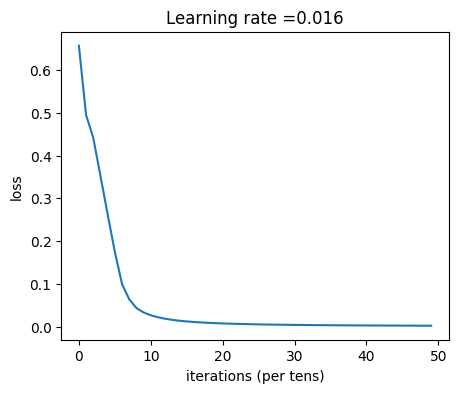

Accuracy: 0.74
LR: 0.032 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.5772415388470538
Loss after iteration 200: 0.490836658120869
Loss after iteration 300: 0.44670016357966624
Loss after iteration 400: 0.34332477459124455
Loss after iteration 500: 0.353020142425612
Loss after iteration 600: 0.33616199317317086
Loss after iteration 700: 0.30966532400861374
Loss after iteration 800: 0.16621935379648134
Loss after iteration 900: 0.1514349836872567
Loss after iteration 1000: 0.13930225425650772
Loss after iteration 1100: 0.11871595341894535
Loss after iteration 1200: 0.10996285348919728
Loss after iteration 1300: 0.10995296672573282
Loss after iteration 1400: 0.09855085178837752
Loss after iteration 1500: 0.08303894209824879
Loss after iteration 1600: 0.07607226791585321
Loss after iteration 1700: 0.06914564645520478
Loss after iteration 1800: 0.0632136652749195
Loss after iteration 1900: 0.05924767494830631
Loss after iteration 2000: 0.05561262582079071
L

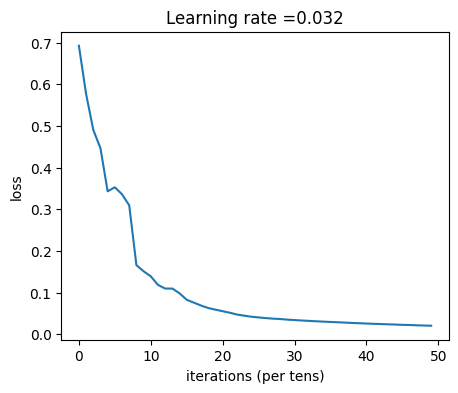

Accuracy: 0.68
LR: 0.032 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.5895763340054263
Loss after iteration 200: 0.5190164643848041
Loss after iteration 300: 0.4681269262015265
Loss after iteration 400: 0.32343352343301657
Loss after iteration 500: 0.6159111240298871
Loss after iteration 600: 0.135287384156539
Loss after iteration 700: 0.1759674181556578
Loss after iteration 800: 0.07303350311452947
Loss after iteration 900: 0.046115695008419805
Loss after iteration 1000: 0.028309836088459144
Loss after iteration 1100: 0.01696671920276885
Loss after iteration 1200: 0.012592287185165092
Loss after iteration 1300: 0.009977499236033594
Loss after iteration 1400: 0.008179215433611005
Loss after iteration 1500: 0.006913420113621037
Loss after iteration 1600: 0.00594160900151609
Loss after iteration 1700: 0.005194732865107691
Loss after iteration 1800: 0.004598053420271
Loss after iteration 1900: 0.004113285349986296
Loss after iteration 2000: 0.0037068683739

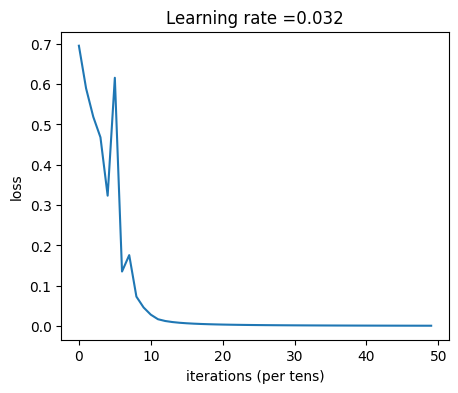

Accuracy: 0.7
LR: 0.032 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.5871017294859785
Loss after iteration 200: 0.5022729740604155
Loss after iteration 300: 0.4141186112843108
Loss after iteration 400: 0.27451251922991776
Loss after iteration 500: 0.26517705973926703
Loss after iteration 600: 0.16151711455275494
Loss after iteration 700: 0.14525786576294603
Loss after iteration 800: 0.05161263627500949
Loss after iteration 900: 0.03028918734307255
Loss after iteration 1000: 0.019920555232949267
Loss after iteration 1100: 0.014521241549034279
Loss after iteration 1200: 0.011205169287756011
Loss after iteration 1300: 0.008942893858099953
Loss after iteration 1400: 0.0073911263596339585
Loss after iteration 1500: 0.006258116672164294
Loss after iteration 1600: 0.005378978199406318
Loss after iteration 1700: 0.004712076618211648
Loss after iteration 1800: 0.004181139340340889
Loss after iteration 1900: 0.003738746346522226
Loss after iteration 2000: 0.00337

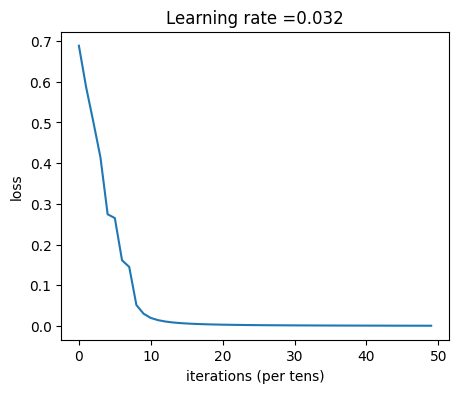

Accuracy: 0.78
LR: 0.032 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.5740713627836256
Loss after iteration 200: 0.4970388773939718
Loss after iteration 300: 0.38007125978737927
Loss after iteration 400: 0.29534986444314604
Loss after iteration 500: 0.2246336761583198
Loss after iteration 600: 0.09841147863054052
Loss after iteration 700: 0.05383676216061453
Loss after iteration 800: 0.028279098920764783
Loss after iteration 900: 0.018822840984008864
Loss after iteration 1000: 0.013751866665010085
Loss after iteration 1100: 0.010699527535430993
Loss after iteration 1200: 0.008685421799901071
Loss after iteration 1300: 0.007243805366329932
Loss after iteration 1400: 0.006189723757252868
Loss after iteration 1500: 0.005374032199387101
Loss after iteration 1600: 0.004734169128143021
Loss after iteration 1700: 0.004227489608257999
Loss after iteration 1800: 0.0037966600352550557
Loss after iteration 1900: 0.0034333121566359594
Loss after iteration 2000: 0.

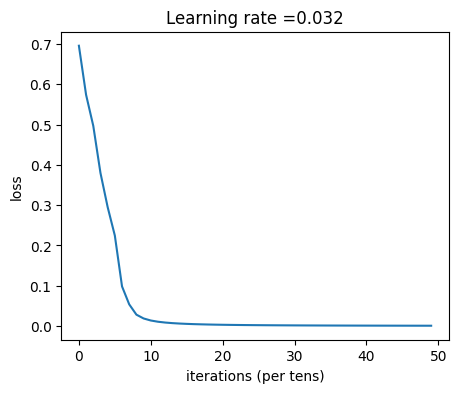

Accuracy: 0.76
LR: 0.032 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.5586371747074698
Loss after iteration 200: 0.48729716537667916
Loss after iteration 300: 0.38950499041223874
Loss after iteration 400: 0.25673505548326436
Loss after iteration 500: 0.2101806256951127
Loss after iteration 600: 0.08150699834735876
Loss after iteration 700: 0.044136351557220635
Loss after iteration 800: 0.023998660295318875
Loss after iteration 900: 0.016619105869456287
Loss after iteration 1000: 0.01262306454029938
Loss after iteration 1100: 0.010041853769952695
Loss after iteration 1200: 0.008246634906178723
Loss after iteration 1300: 0.006937398222357804
Loss after iteration 1400: 0.005976245968026914
Loss after iteration 1500: 0.005221713524059594
Loss after iteration 1600: 0.004622102193753903
Loss after iteration 1700: 0.00412619210744581
Loss after iteration 1800: 0.0037279896901011005
Loss after iteration 1900: 0.0033861037888234685
Loss after iteration 2000: 0.

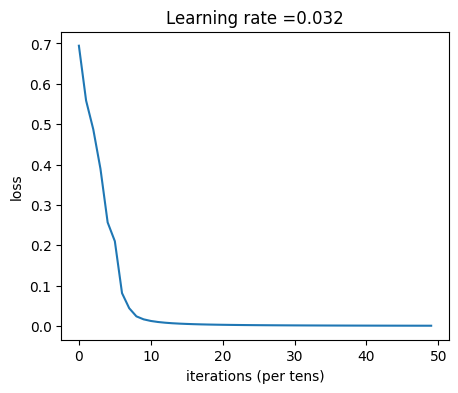

Accuracy: 0.72
LR: 0.032 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.555269360954221
Loss after iteration 200: 0.45415057018896193
Loss after iteration 300: 0.2779723072083937
Loss after iteration 400: 0.1628186750875642
Loss after iteration 500: 0.10384073006012476
Loss after iteration 600: 0.05119255118580246
Loss after iteration 700: 0.027699044948915338
Loss after iteration 800: 0.018887425523582694
Loss after iteration 900: 0.013934409659236533
Loss after iteration 1000: 0.010881609453673642
Loss after iteration 1100: 0.008819226472561646
Loss after iteration 1200: 0.007330123825539343
Loss after iteration 1300: 0.006244641145981137
Loss after iteration 1400: 0.005415487397016649
Loss after iteration 1500: 0.004768757456244966
Loss after iteration 1600: 0.00423540843269213
Loss after iteration 1700: 0.0038072587251097956
Loss after iteration 1800: 0.0034504610635985493
Loss after iteration 1900: 0.0031496191667140776
Loss after iteration 2000: 0

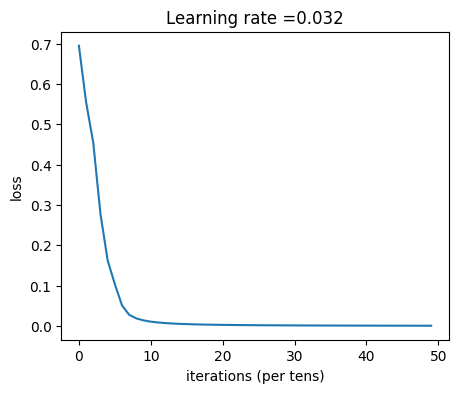

Accuracy: 0.8
LR: 0.032 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.5415701820088471
Loss after iteration 200: 0.34715412342656543
Loss after iteration 300: 0.29957254016445123
Loss after iteration 400: 0.15504804434720945
Loss after iteration 500: 0.07554302950269759
Loss after iteration 600: 0.03831356225305821
Loss after iteration 700: 0.023106045943604714
Loss after iteration 800: 0.01636944441444125
Loss after iteration 900: 0.012429066633730735
Loss after iteration 1000: 0.009889644397048957
Loss after iteration 1100: 0.00813274881150789
Loss after iteration 1200: 0.00685187961069095
Loss after iteration 1300: 0.005893678946391243
Loss after iteration 1400: 0.005144811335401739
Loss after iteration 1500: 0.004550781390040618
Loss after iteration 1600: 0.004069858183224961
Loss after iteration 1700: 0.0036738400030099047
Loss after iteration 1800: 0.0033400573416107232
Loss after iteration 1900: 0.0030577006834182205
Loss after iteration 2000: 0

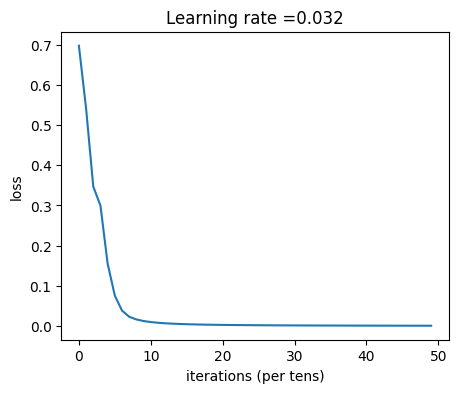

Accuracy: 0.74
LR: 0.032 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.516675876729419
Loss after iteration 200: 0.2955235819092064
Loss after iteration 300: 0.20538442614147193
Loss after iteration 400: 0.13175210562549808
Loss after iteration 500: 0.04873414048423659
Loss after iteration 600: 0.02907958824919468
Loss after iteration 700: 0.019121442589942778
Loss after iteration 800: 0.01403283328692989
Loss after iteration 900: 0.010939660539218469
Loss after iteration 1000: 0.008857827994969748
Loss after iteration 1100: 0.007384650228249257
Loss after iteration 1200: 0.006293408283571301
Loss after iteration 1300: 0.005461017645868634
Loss after iteration 1400: 0.004803449169293725
Loss after iteration 1500: 0.004276775429513363
Loss after iteration 1600: 0.003845249693488747
Loss after iteration 1700: 0.0034862860092906445
Loss after iteration 1800: 0.0031832302363917556
Loss after iteration 1900: 0.0029247675610655794
Loss after iteration 2000: 

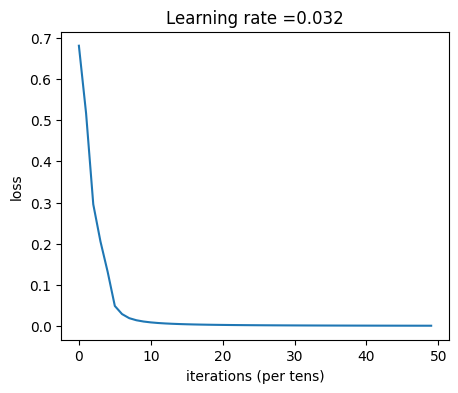

Accuracy: 0.74
LR: 0.032 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.4809963227972483
Loss after iteration 200: 0.2512109829507946
Loss after iteration 300: 0.18702239096852272
Loss after iteration 400: 0.08192893894811877
Loss after iteration 500: 0.03757011757370219
Loss after iteration 600: 0.02288783789117134
Loss after iteration 700: 0.016294257170528376
Loss after iteration 800: 0.012416188054040987
Loss after iteration 900: 0.009902070509067896
Loss after iteration 1000: 0.008160026042878061
Loss after iteration 1100: 0.0068922294124064065
Loss after iteration 1200: 0.005931206820999764
Loss after iteration 1300: 0.0051859195405641965
Loss after iteration 1400: 0.004592604207056587
Loss after iteration 1500: 0.004110345052620366
Loss after iteration 1600: 0.003712773964456814
Loss after iteration 1700: 0.003378191420432662
Loss after iteration 1800: 0.003094881518220451
Loss after iteration 1900: 0.00285161167377841
Loss after iteration 2000:

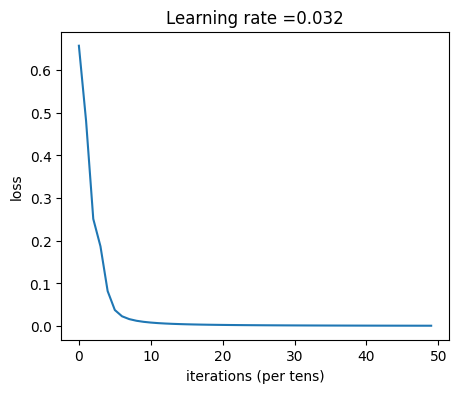

Accuracy: 0.74
LR: 0.064 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.5849156795685403
Loss after iteration 200: 0.451832330798052
Loss after iteration 300: 0.37143265992867047
Loss after iteration 400: 0.4820391921488167
Loss after iteration 500: 0.5155338587518359
Loss after iteration 600: 0.3624976798369271
Loss after iteration 700: 0.30208969957899806
Loss after iteration 800: 0.2109453025320603
Loss after iteration 900: 0.5905741831228608
Loss after iteration 1000: 0.20033252786126823
Loss after iteration 1100: 0.1728018760552329
Loss after iteration 1200: 0.14275079134392454
Loss after iteration 1300: 0.13092279890630878
Loss after iteration 1400: 0.1244501107584614
Loss after iteration 1500: 0.12030731020910264
Loss after iteration 1600: 0.12453396048909458
Loss after iteration 1700: 0.1168211920851078
Loss after iteration 1800: 0.11878009898638725
Loss after iteration 1900: 0.11522858659977131
Loss after iteration 2000: 0.11451365625752176
Loss 

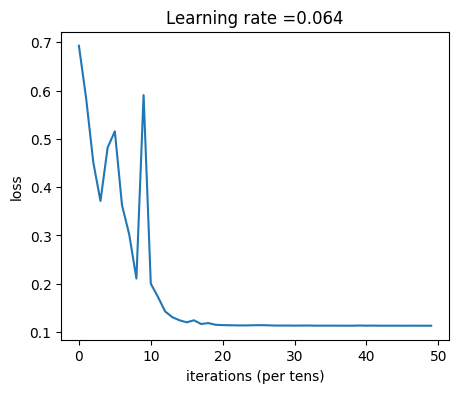

Accuracy: 0.6000000000000001
LR: 0.064 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6904369829007906
Loss after iteration 200: 0.5478376591258166
Loss after iteration 300: 0.41481991446577743
Loss after iteration 400: 0.3672739197574988
Loss after iteration 500: 0.3696316048629242
Loss after iteration 600: 0.26084807271971183
Loss after iteration 700: 0.5512497342110125
Loss after iteration 800: 0.2949632730066094
Loss after iteration 900: 0.40254016858595293
Loss after iteration 1000: 0.1903392371864286
Loss after iteration 1100: 0.33898753616775723
Loss after iteration 1200: 0.047045726745775375
Loss after iteration 1300: 0.03465692040243238
Loss after iteration 1400: 0.3237678817794367
Loss after iteration 1500: 0.4051209724257955
Loss after iteration 1600: 0.2395683739899106
Loss after iteration 1700: 0.30438515406934774
Loss after iteration 1800: 0.2134715812759848
Loss after iteration 1900: 0.29267145770126624
Loss after iteration 2000: 0.70098289

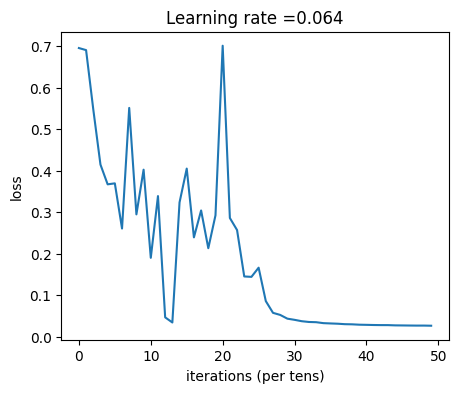

Accuracy: 0.6400000000000001
LR: 0.064 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.5170074710894494
Loss after iteration 200: 0.5198437184587664
Loss after iteration 300: 0.44255348412898105
Loss after iteration 400: 0.42426498189032413
Loss after iteration 500: 0.37921378814190493
Loss after iteration 600: 0.08870801671611118
Loss after iteration 700: 0.09224180906589687
Loss after iteration 800: 0.038167492558236545
Loss after iteration 900: 0.45213321810390905
Loss after iteration 1000: 0.4295813087650337
Loss after iteration 1100: 0.2760094358653773
Loss after iteration 1200: 0.37202047094187857
Loss after iteration 1300: 0.5256816594746992
Loss after iteration 1400: 0.29124274679515455
Loss after iteration 1500: 0.16845434850644017
Loss after iteration 1600: 0.11580998136712778
Loss after iteration 1700: 0.3469455069740275
Loss after iteration 1800: 0.2515033605033028
Loss after iteration 1900: 0.13336491948751272
Loss after iteration 2000: 0.2319

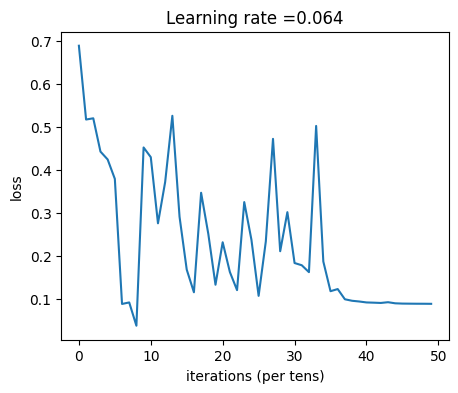

Accuracy: 0.5800000000000001
LR: 0.064 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.5046885564215843
Loss after iteration 200: 0.5061854217866291
Loss after iteration 300: 0.3540812254255469
Loss after iteration 400: 0.263174860396948
Loss after iteration 500: 0.2419459986782157
Loss after iteration 600: 0.39963929005948307
Loss after iteration 700: 0.06752742343957473
Loss after iteration 800: 0.03689502876912638
Loss after iteration 900: 0.0144846270097981
Loss after iteration 1000: 0.008488204817894487
Loss after iteration 1100: 0.005930231280168622
Loss after iteration 1200: 0.004525672295692992
Loss after iteration 1300: 0.003628621462296219
Loss after iteration 1400: 0.002998700851891012
Loss after iteration 1500: 0.002549478543746726
Loss after iteration 1600: 0.002210437410412073
Loss after iteration 1700: 0.0019384349973617118
Loss after iteration 1800: 0.0017219223248800442
Loss after iteration 1900: 0.0015483559510966792
Loss after iteration

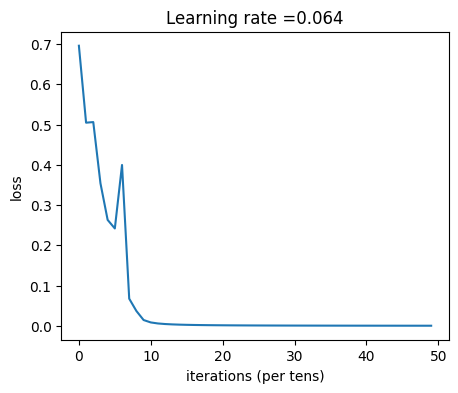

Accuracy: 0.72
LR: 0.064 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.5752443044618769
Loss after iteration 200: 0.41279828017361486
Loss after iteration 300: 0.30977682327149536
Loss after iteration 400: 0.21255351862133892
Loss after iteration 500: 0.4606839907979629
Loss after iteration 600: 0.14373592774333283
Loss after iteration 700: 0.24772363499744843
Loss after iteration 800: 0.07907256657330713
Loss after iteration 900: 0.023579039394143304
Loss after iteration 1000: 0.010965418668382926
Loss after iteration 1100: 0.007189001068869994
Loss after iteration 1200: 0.005223113118972499
Loss after iteration 1300: 0.004049193033909471
Loss after iteration 1400: 0.0032461895748981985
Loss after iteration 1500: 0.002656255179777278
Loss after iteration 1600: 0.0022523363269459523
Loss after iteration 1700: 0.0019266609254559816
Loss after iteration 1800: 0.0016829079220126299
Loss after iteration 1900: 0.0014996775571206333
Loss after iteration 2000:

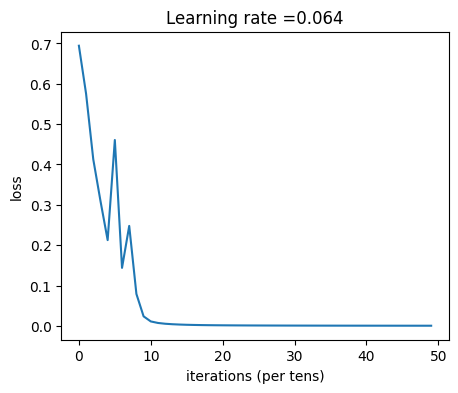

Accuracy: 0.76
LR: 0.064 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.49329560683459023
Loss after iteration 200: 0.6914885416694008
Loss after iteration 300: 0.32754895863115796
Loss after iteration 400: 0.19589626057796192
Loss after iteration 500: 0.24777648765642582
Loss after iteration 600: 0.03109619138823017
Loss after iteration 700: 0.014581711283928094
Loss after iteration 800: 0.009154726017439668
Loss after iteration 900: 0.006487445358156368
Loss after iteration 1000: 0.004978949660710729
Loss after iteration 1100: 0.0039806603567640545
Loss after iteration 1200: 0.0032959828560321495
Loss after iteration 1300: 0.0027952071137728345
Loss after iteration 1400: 0.0024145787558939496
Loss after iteration 1500: 0.002122589992573276
Loss after iteration 1600: 0.0018873714834449363
Loss after iteration 1700: 0.0016955928160595985
Loss after iteration 1800: 0.00153611232722402
Loss after iteration 1900: 0.0014029032475266674
Loss after iteration 

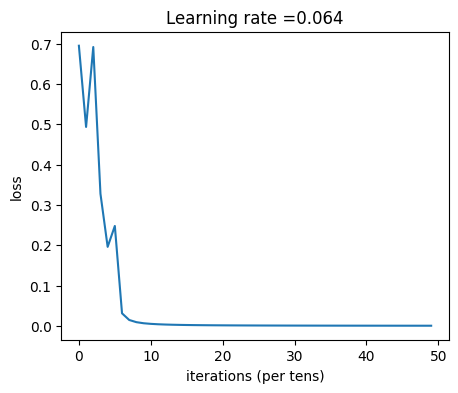

Accuracy: 0.74
LR: 0.064 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.5144338536090737
Loss after iteration 200: 0.4066527218570499
Loss after iteration 300: 0.43061595426271615
Loss after iteration 400: 0.3828403760784803
Loss after iteration 500: 0.0931538694541135
Loss after iteration 600: 0.04417535424003568
Loss after iteration 700: 0.012831494655181094
Loss after iteration 800: 0.008081149547318887
Loss after iteration 900: 0.0058053394676850735
Loss after iteration 1000: 0.004469147444461481
Loss after iteration 1100: 0.0036053496572542748
Loss after iteration 1200: 0.002984996905054021
Loss after iteration 1300: 0.0025445669917093473
Loss after iteration 1400: 0.0022109646452558194
Loss after iteration 1500: 0.0019473319792297737
Loss after iteration 1600: 0.0017368312616568606
Loss after iteration 1700: 0.0015556211043516982
Loss after iteration 1800: 0.0014032794582921023
Loss after iteration 1900: 0.0012828169506175684
Loss after iteration 

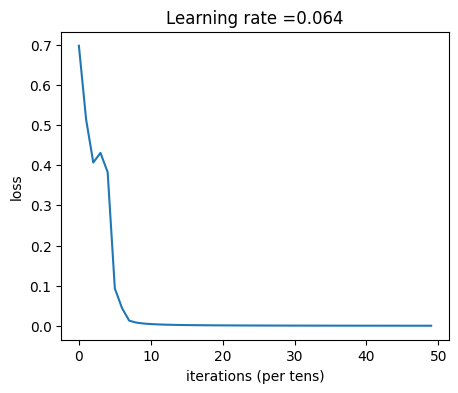

Accuracy: 0.76
LR: 0.064 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.6450533389865841
Loss after iteration 200: 0.4098285267779427
Loss after iteration 300: 0.7377039288441654
Loss after iteration 400: 0.311457997885133
Loss after iteration 500: 0.03998296434991999
Loss after iteration 600: 0.017074375891156075
Loss after iteration 700: 0.00999650210842565
Loss after iteration 800: 0.0069564279534083395
Loss after iteration 900: 0.005212769812392475
Loss after iteration 1000: 0.004139252193865287
Loss after iteration 1100: 0.003401016199358207
Loss after iteration 1200: 0.00286893847909581
Loss after iteration 1300: 0.002473883963938764
Loss after iteration 1400: 0.002168694649099166
Loss after iteration 1500: 0.0019230194467026208
Loss after iteration 1600: 0.0017252577767737543
Loss after iteration 1700: 0.0015624596858293894
Loss after iteration 1800: 0.001425054404314748
Loss after iteration 1900: 0.001308764049895945
Loss after iteration 2000: 0

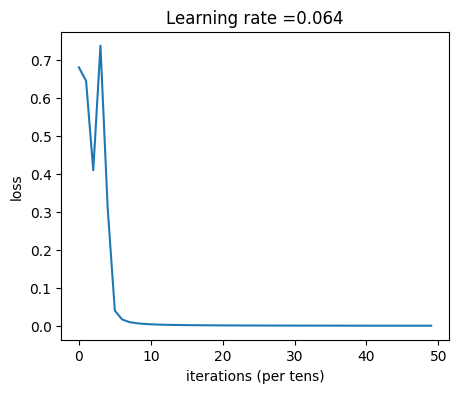

Accuracy: 0.76
LR: 0.064 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.4049024782190154
Loss after iteration 200: 0.2995071079580359
Loss after iteration 300: 0.2593506966542113
Loss after iteration 400: 0.19075405946575327
Loss after iteration 500: 0.028862154925286893
Loss after iteration 600: 0.013195130049699291
Loss after iteration 700: 0.00815348892895513
Loss after iteration 800: 0.005741296691477599
Loss after iteration 900: 0.0043821621392832475
Loss after iteration 1000: 0.003521144414715838
Loss after iteration 1100: 0.0029121001260450086
Loss after iteration 1200: 0.002472141265405939
Loss after iteration 1300: 0.002150064661388291
Loss after iteration 1400: 0.0018983831389064107
Loss after iteration 1500: 0.0016962074225277855
Loss after iteration 1600: 0.0015315897299309114
Loss after iteration 1700: 0.0013938515053037166
Loss after iteration 1800: 0.001276914952791487
Loss after iteration 1900: 0.0011766955038686468
Loss after iteration

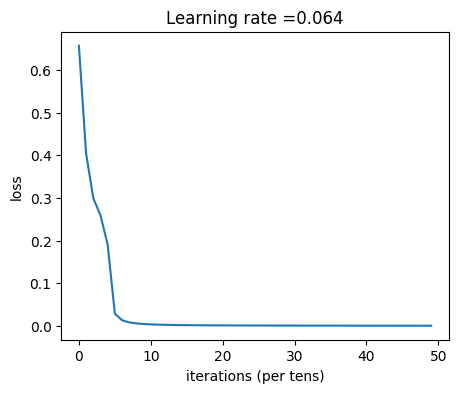

Accuracy: 0.7200000000000001
LR: 0.128 HLS: 4
Loss after iteration 0: 0.6927182928370386
Loss after iteration 100: 0.6335212896267878
Loss after iteration 200: 0.50956987197012
Loss after iteration 300: 0.5309375906132277
Loss after iteration 400: 0.6004732663694855
Loss after iteration 500: 0.6177794174565124
Loss after iteration 600: 0.6390823803953157
Loss after iteration 700: 0.49916141567628375
Loss after iteration 800: 0.5696728943321541
Loss after iteration 900: 0.6210904705476703
Loss after iteration 1000: 0.6089912026160091
Loss after iteration 1100: 0.3895660704334929
Loss after iteration 1200: 0.46706167211937705
Loss after iteration 1300: 0.6235060381311933
Loss after iteration 1400: 0.5250191869303963
Loss after iteration 1500: 0.6193158255368123
Loss after iteration 1600: 0.7020539242403326
Loss after iteration 1700: 0.627691836351873
Loss after iteration 1800: 0.6280226397913795
Loss after iteration 1900: 0.6275187841304656
Loss after iteration 2000: 0.6274866243101266
L

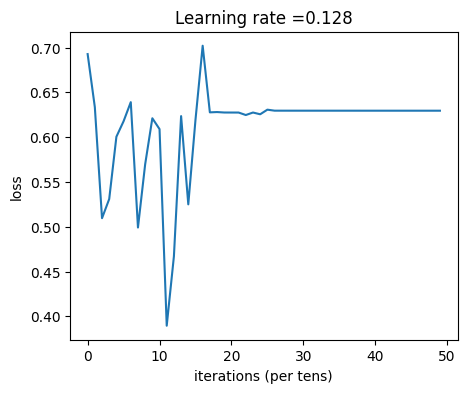

Accuracy: 0.3400000000000001
LR: 0.128 HLS: 8
Loss after iteration 0: 0.6953856240569644
Loss after iteration 100: 0.6363959472304815
Loss after iteration 200: 0.6264171384530601
Loss after iteration 300: 0.6407465820122866
Loss after iteration 400: 0.6272031354965057
Loss after iteration 500: 0.6180789721366111
Loss after iteration 600: 0.40103803805297705
Loss after iteration 700: 0.49441708459214506
Loss after iteration 800: 0.5321471143889052
Loss after iteration 900: 0.6131539594660722
Loss after iteration 1000: 0.3605455564022491
Loss after iteration 1100: 0.38031033277920395
Loss after iteration 1200: 0.34584731485580444
Loss after iteration 1300: 0.3271482270802076
Loss after iteration 1400: 0.6536572184062983
Loss after iteration 1500: 0.6316897339943183
Loss after iteration 1600: 0.6316300804731105
Loss after iteration 1700: 0.6316296172806725
Loss after iteration 1800: 0.631629382892146
Loss after iteration 1900: 0.6277604915403575
Loss after iteration 2000: 0.44773839042733

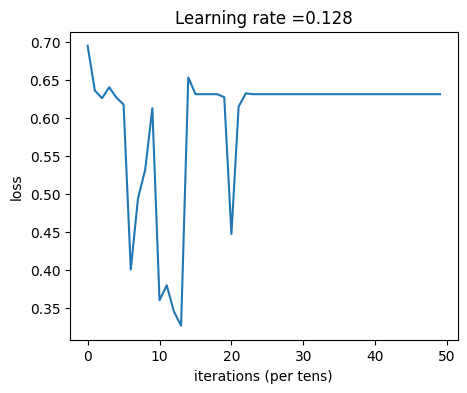

Accuracy: 0.3400000000000001
LR: 0.128 HLS: 16
Loss after iteration 0: 0.688393523147324
Loss after iteration 100: 0.6468562316107618
Loss after iteration 200: 0.6214661311702976
Loss after iteration 300: 0.509837824484955
Loss after iteration 400: 0.4773930149612988
Loss after iteration 500: 0.6019489214752198
Loss after iteration 600: 0.5755279482829896
Loss after iteration 700: 0.6230938727612874
Loss after iteration 800: 0.6486149855465925
Loss after iteration 900: 0.5410610820472388
Loss after iteration 1000: 0.5820177339333278
Loss after iteration 1100: 0.4406094491346603
Loss after iteration 1200: 0.4224504641076812
Loss after iteration 1300: 0.632358126369435
Loss after iteration 1400: 0.6295805449349662
Loss after iteration 1500: 0.6295637113443182
Loss after iteration 1600: 0.6295583220110663
Loss after iteration 1700: 0.6295544626050471
Loss after iteration 1800: 0.6295514790021033
Loss after iteration 1900: 0.6294843933796245
Loss after iteration 2000: 0.5929251326537051
Lo

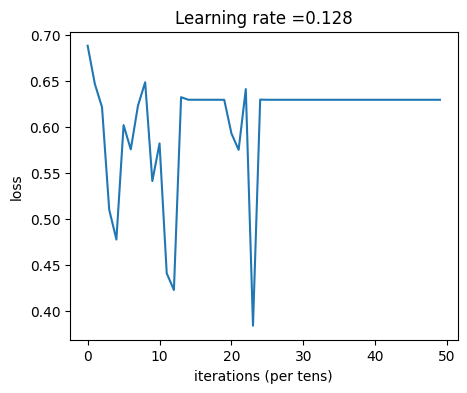

Accuracy: 0.3400000000000001
LR: 0.128 HLS: 32
Loss after iteration 0: 0.6958688750524835
Loss after iteration 100: 0.6354055459495112
Loss after iteration 200: 0.5966822088554965
Loss after iteration 300: 0.5339975896896518
Loss after iteration 400: 0.5952323431801172
Loss after iteration 500: 0.5379649358550275
Loss after iteration 600: 0.5942157915954024
Loss after iteration 700: 0.4071012114167011
Loss after iteration 800: 0.43267216527512453
Loss after iteration 900: 0.376313277880845
Loss after iteration 1000: 0.2656326449644318
Loss after iteration 1100: 0.3437054562634352
Loss after iteration 1200: 0.5776402581948887
Loss after iteration 1300: 0.49998158802491793
Loss after iteration 1400: 0.29849965441885395
Loss after iteration 1500: 0.27975131600151637
Loss after iteration 1600: 0.2028620146510606
Loss after iteration 1700: 0.16624561402166785
Loss after iteration 1800: 0.28815754794599185
Loss after iteration 1900: 0.4195083714642069
Loss after iteration 2000: 0.27982300587

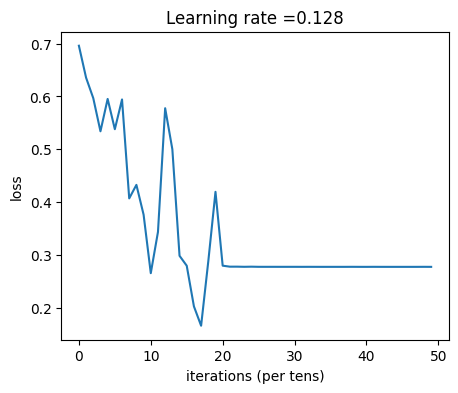

Accuracy: 0.72
LR: 0.128 HLS: 64
Loss after iteration 0: 0.6943583126001486
Loss after iteration 100: 0.6050401798436876
Loss after iteration 200: 0.6451373939257987
Loss after iteration 300: 0.5389468324586286
Loss after iteration 400: 0.5680884937209222
Loss after iteration 500: 0.46436864526450566
Loss after iteration 600: 0.49292616372268383
Loss after iteration 700: 0.4835067488775158
Loss after iteration 800: 0.5580488572473036
Loss after iteration 900: 0.7102034938324713
Loss after iteration 1000: 0.44727912565336386
Loss after iteration 1100: 0.3735642826422501
Loss after iteration 1200: 0.587752140222244
Loss after iteration 1300: 0.4005684200745968
Loss after iteration 1400: 0.66775112532521
Loss after iteration 1500: 0.5004948886246033
Loss after iteration 1600: 0.6441303768892012
Loss after iteration 1700: 0.457340740292745
Loss after iteration 1800: 0.5972425195501532
Loss after iteration 1900: 0.34896704564002706
Loss after iteration 2000: 0.5035305471793701
Loss after it

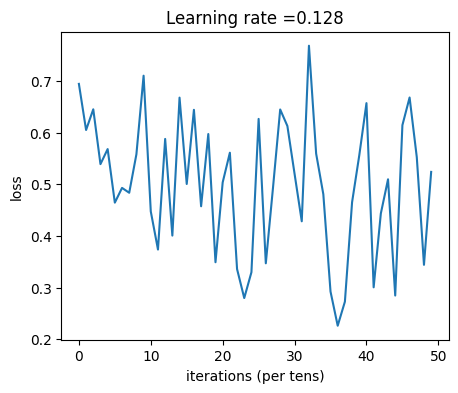

Accuracy: 0.66
LR: 0.128 HLS: 128
Loss after iteration 0: 0.6946931134128321
Loss after iteration 100: 0.6309879368067369
Loss after iteration 200: 0.5681611360585117
Loss after iteration 300: 0.6251229000787268
Loss after iteration 400: 0.5529185015586899
Loss after iteration 500: 0.42110726169907114
Loss after iteration 600: 0.3781970326838864
Loss after iteration 700: 0.49735966620423033
Loss after iteration 800: 0.6469607747835076
Loss after iteration 900: 0.5072324163754934
Loss after iteration 1000: 0.49103061939198994
Loss after iteration 1100: 0.3434039955740827
Loss after iteration 1200: 0.5255309216727329
Loss after iteration 1300: 0.43524637927613485
Loss after iteration 1400: 0.34683991342713844
Loss after iteration 1500: 0.3420346911750669
Loss after iteration 1600: 0.6177558969782713
Loss after iteration 1700: 0.26542524495633274
Loss after iteration 1800: 0.2254439635757743
Loss after iteration 1900: 0.564314038952002
Loss after iteration 2000: 0.5028892698424228
Loss af

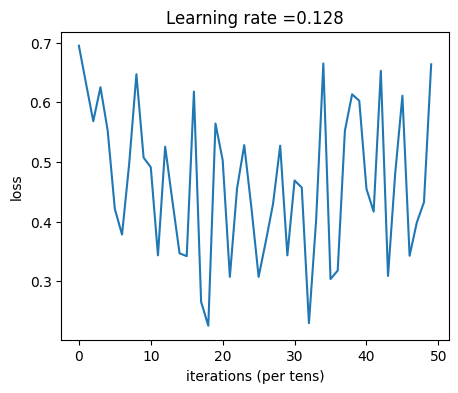

Accuracy: 0.3400000000000001
LR: 0.128 HLS: 256
Loss after iteration 0: 0.6974418158357125
Loss after iteration 100: 0.5285715937278401
Loss after iteration 200: 0.517656696054408
Loss after iteration 300: 0.6889653588779143
Loss after iteration 400: 0.6455964001211065
Loss after iteration 500: 0.6429323782740696
Loss after iteration 600: 0.5977904319614609
Loss after iteration 700: 0.5123600323442679
Loss after iteration 800: 0.50307227711504
Loss after iteration 900: 0.43508506839290306
Loss after iteration 1000: 0.40584513896747365
Loss after iteration 1100: 0.41314221135744694
Loss after iteration 1200: 0.47775416500999707
Loss after iteration 1300: 0.6669063793526325
Loss after iteration 1400: 0.5107155441863463
Loss after iteration 1500: 0.60224389144108
Loss after iteration 1600: 0.6144412925674746
Loss after iteration 1700: 0.44706526167320054
Loss after iteration 1800: 0.4955289370202612
Loss after iteration 1900: 0.2691314824920973
Loss after iteration 2000: 0.451446710289614

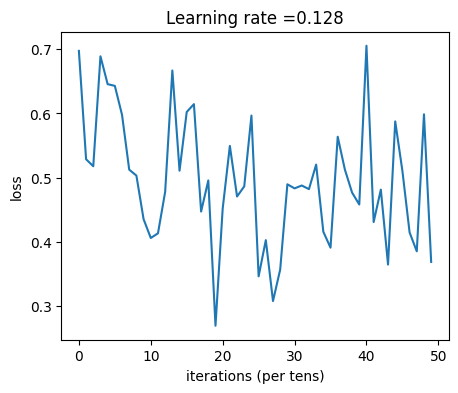

Accuracy: 0.3400000000000001
LR: 0.128 HLS: 512
Loss after iteration 0: 0.6807277547580761
Loss after iteration 100: 0.6385240876861596
Loss after iteration 200: 0.5620587895739884
Loss after iteration 300: 0.3749141042041476
Loss after iteration 400: 0.4687057323387675
Loss after iteration 500: 0.6298751736585291
Loss after iteration 600: 0.41280327807272293
Loss after iteration 700: 0.4268337579988225
Loss after iteration 800: 0.412327353046758
Loss after iteration 900: 0.35607803822002654
Loss after iteration 1000: 0.30067757836648484
Loss after iteration 1100: 0.4246985273891943
Loss after iteration 1200: 0.43236518562397874
Loss after iteration 1300: 0.49829226672151605
Loss after iteration 1400: 0.3948225592295566
Loss after iteration 1500: 0.35780881403405174
Loss after iteration 1600: 0.3554180556832613
Loss after iteration 1700: 0.2961159571514592
Loss after iteration 1800: 0.43411835429673
Loss after iteration 1900: 0.4356506094933896
Loss after iteration 2000: 0.241824516494

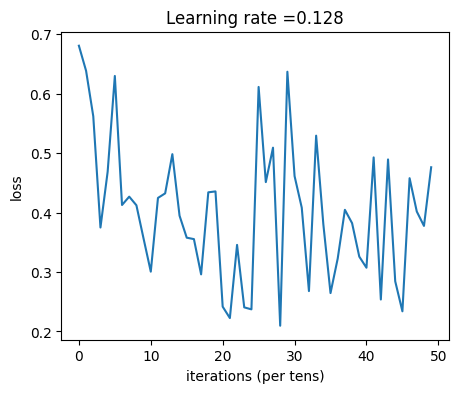

Accuracy: 0.36000000000000004
LR: 0.128 HLS: 1024
Loss after iteration 0: 0.6572858862616765
Loss after iteration 100: 0.5490755469151313
Loss after iteration 200: 0.5074248880011165
Loss after iteration 300: 0.46605850284437833
Loss after iteration 400: 0.5939361093636121
Loss after iteration 500: 0.38970658071603087
Loss after iteration 600: 0.38203561427121346
Loss after iteration 700: 0.32833137217695085
Loss after iteration 800: 0.4245678901915757
Loss after iteration 900: 0.4243845158348511
Loss after iteration 1000: 0.43950648856827396
Loss after iteration 1100: 0.42871974681575903
Loss after iteration 1200: 0.3488812000643874
Loss after iteration 1300: 0.5737978650865435
Loss after iteration 1400: 0.5659228004758206
Loss after iteration 1500: 0.33076888237792
Loss after iteration 1600: 0.20395319300731227
Loss after iteration 1700: 0.5992712212122435
Loss after iteration 1800: 0.5301731194063808
Loss after iteration 1900: 0.4685218524300529
Loss after iteration 2000: 0.42601884

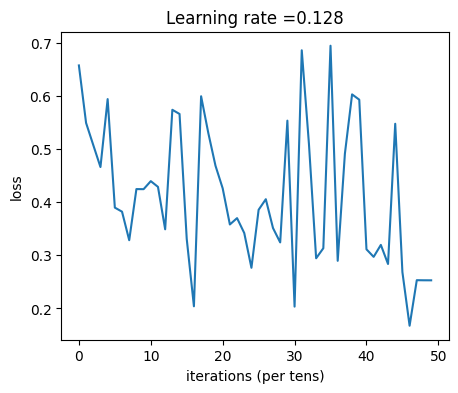

Accuracy: 0.6000000000000001


In [55]:
EPOCHS = 5000
learning_rates = [0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128]
hidden_layer_sizes = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

losses_lr = []
losses_hls = []
losses_all = np.zeros((len(learning_rates), len(hidden_layer_sizes)))

acc_lr = []
acc_hls = []
acc_all = np.zeros((len(learning_rates), len(hidden_layer_sizes)))

print("MODIFYING LEARNING RATE:")
for lr in learning_rates:
  print("LEARNING RATE:", lr)
  parameters = two_layer_model(train_x, train_y, (n_x, n_h, n_y), lr, num_iterations=EPOCHS, print_loss=True)
  losses_lr.append(compute_loss(two_layer_forward(train_x, parameters)[0], train_y))
  acc_lr.append(str(np.sum((predict(test_x, test_y, parameters) == test_y)/test_x.shape[1])))

print("MODIFYING HIDDEN LAYER SIZE:")
for hls in hidden_layer_sizes:
  print("LAYER SIZE:", hls)
  parameters = two_layer_model(train_x, train_y, (n_x, hls, n_y), num_iterations=EPOCHS, print_loss=True)
  losses_hls.append(compute_loss(two_layer_forward(train_x, parameters)[0], train_y))
  acc_hls.append(str(np.sum((predict(test_x, test_y, parameters) == test_y)/test_x.shape[1])))

print("MODIFYING BOTH:")
for i, lr in enumerate(learning_rates):
  for j, hls in enumerate(hidden_layer_sizes):
    print("LR:", lr, "HLS:", hls)
    parameters = two_layer_model(train_x, train_y, (n_x, hls, n_y), lr, num_iterations=EPOCHS, print_loss=True)
    losses_all[i][j] = compute_loss(two_layer_forward(train_x, parameters)[0], train_y)
    acc_all[i][j] = str(np.sum((predict(test_x, test_y, parameters) == test_y)/test_x.shape[1]))

In [21]:
np.argmin(losses_lr), np.argmin(losses_hls), np.argmin(losses_all)

NameError: name 'losses_lr' is not defined

In [56]:
losses_lr, losses_hls, losses_all, acc_lr, acc_hls, acc_all

([0.16043246508595635,
  0.03471315746713182,
  0.007502302085724079,
  0.0023566725457617073,
  0.004215882009317924,
  0.02265818269307537,
  0.6439737380528059],
 [0.0964716636612606,
  0.0069319598402658306,
  0.006609236092991585,
  0.006414690543460285,
  0.006321153230082569,
  0.005997798007991268,
  0.00573868714483046,
  0.005519436088181511,
  0.005242767859644643],
 array([[2.59664493e-01, 1.09368238e-01, 1.04191663e-01, 1.00359594e-01,
         9.37336264e-02, 8.07123732e-02, 7.42236383e-02, 6.53823893e-02,
         5.50683680e-02],
        [1.37754492e-01, 2.16000275e-02, 2.10694413e-02, 2.03745389e-02,
         1.96780343e-02, 1.81471993e-02, 1.72139161e-02, 1.61169572e-02,
         1.47372916e-02],
        [9.35125771e-02, 6.24211576e-03, 5.99494517e-03, 5.76998557e-03,
         5.70906068e-03, 5.42736944e-03, 5.19243265e-03, 5.01060748e-03,
         4.75321293e-03],
        [2.82558864e-02, 2.10561027e-03, 2.13997697e-03, 2.04897523e-03,
         2.08777661e-03, 1.9149

By just changing the learning rate, the lowest loss

##  9. Analyze Image Classification Results

First, let's take a look at some images the 2-layer model labeled incorrectly. This will show a few mislabeled images.

In [33]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

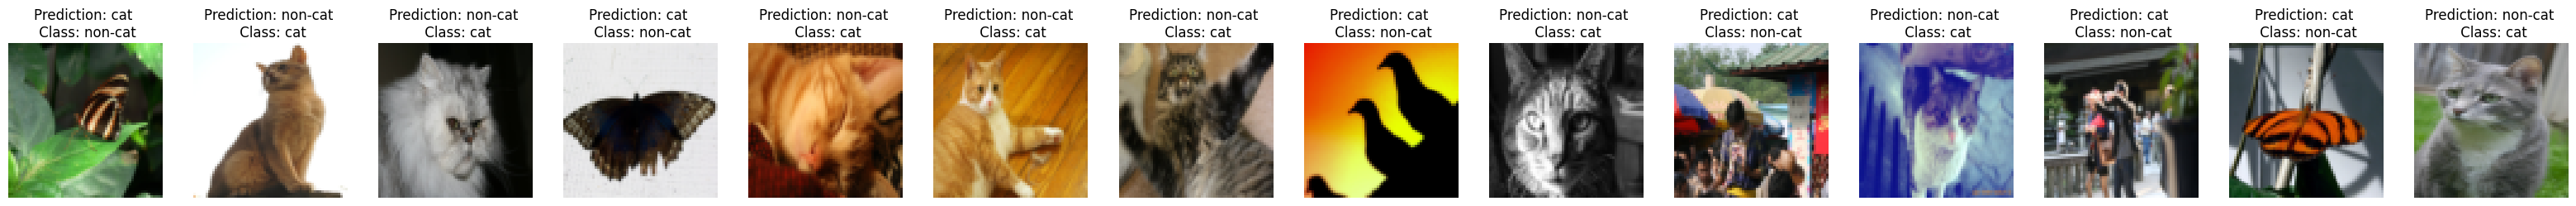

In [34]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

***Exercise:*** Identify a few types of images that tends to perform poorly on the model

**ANSWER:** 
- Images where the cat somewhat blends into the background 
- Images with fewer colors, such as ones where there is a large black or white area
- Images of butterflies, possibly becuase of the similar striped pattern and pointy wings like cat ears

#  Part 3: Predict Movie Review Sentiment

Now, lets use the same architecture to predict sentiment of movie reviews. In this section, most of the implementation is already provided. The exercises are mainly to understand what the workflow is when handling the text data.

## Datatset

**Problem Statement**: You are given a dataset ("train_imdb.txt", "test_imdb.txt") containing:
    - a training set of m_train reviews
    - a test set of m_test reviews
    - the labels for the training examples are such that the first 50% belong to class 1 (positive) and the rest 50% of the data belong to class 0(negative)
    
Let's get more familiar with the dataset. Load the data by completing the function and run the cell below.

In [35]:
def load_data(train_file, test_file):
    train_dataset = []
    test_dataset = []

    # Read the training dataset file line by line
    for line in open(train_file, 'r'):
        train_dataset.append(line.strip())

    for line in open(test_file, 'r'):
        test_dataset.append(line.strip())
    return train_dataset, test_dataset

In [36]:
train_file = "data/train_imdb.txt"
test_file = "data/test_imdb.txt"
train_dataset, test_dataset = load_data(train_file, test_file)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 7088: character maps to <undefined>

In [37]:
# This is just how the data is organized. The first 50% data is positive and the rest 50% is negative for both train and test splits.
y = [1 if i < len(train_dataset)*0.5 else 0 for i in range(len(train_dataset))]

As usual, lets check our dataset

In [38]:
# Example of a review
index = 10
print(train_dataset[index])
print ("y = " + str(y[index]))

I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.
y = 1


In [39]:
# Explore your dataset
m_train = len(train_dataset)
m_test = len(test_dataset)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))

Number of training examples: 1001
Number of testing examples: 201


## 10. Pre-Processing

From the example review, you can see that the raw data is really noisy! This is generally the case with the text data. Hence, Preprocessing the raw input and cleaning the text is  essential. Please run the code snippet provided below.

**Exercise**: Explain what pattern the model is trying to capture using re.compile.

**Type your answer here**
The RegEx first removes all symbol characters and digits, which is then turned to lowercase. Then, it replaces dashes, slashes, and line break HTML with spaces so that the data only contain raw text. We want to limit the number of possible inputs (characters) so the model can generalize better and to prevent overfitting, while removing the digits is important because it could make the model rely on number ratings.

In [40]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):

    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]

    return reviews

train_dataset_clean = preprocess_reviews(train_dataset)
test_dataset_clean = preprocess_reviews(test_dataset)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3683/1269688929.py:1: SyntaxWarning: invalid escape sequence '\.'
  REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
/tmp/ipykernel_3683/1269688929.py:2: SyntaxWarning: invalid escape sequence '\s'
  REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")


In [41]:
# Example of a clean review
index = 10
print(train_dataset_clean[index])
print ("y = " + str(y[index]))

i liked the film some of the action scenes were very interesting tense and well done i especially liked the opening scene which had a semi truck in it a very tense action scene that seemed well done some of the transitional scenes were filmed in interesting ways such as time lapse photography unusual colors or interesting angles also the film is funny is several parts i also liked how the evil guy was portrayed too id give the film an  out of 
y = 1


## Vectorization

Now lets create a feature vector for our reviews based on a simple bag of words model. So, given an input text, we need to create a numerical vector which is simply the vector of word counts for each word of the vocabulary. Run the code below to get the feature representation.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, stop_words="english", max_features=2000)
cv.fit(train_dataset_clean)
X = cv.transform(train_dataset_clean)
X_test = cv.transform(test_dataset_clean)

CountVectorizer provides a sparse feature representation by default which is reasonable because only some words occur in individual example. However, for training neural network models, we generally use a dense representation vector.

In [43]:
X = np.array(X.todense()).astype(float)
X_test = np.array(X_test.todense()).astype(float)
y = np.array(y)

## Model

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.80
)

In [45]:
# This is just to correct the shape of the arrays as required by the two_layer_model
X_train = X_train.T
X_val = X_val.T
y_train = y_train.reshape(1,-1)
y_val = y_val.reshape(1,-1)

In [46]:
### CONSTANTS DEFINING THE MODEL ####
n_x = X_train.shape[0]
n_h = 200
n_y = 1
layers_dims = (n_x, n_h, n_y)

We will use the same two layer model that you completed in the previous section for training.

Loss after iteration 0: 0.6931757418150559
Loss after iteration 100: 0.6924388861748565
Loss after iteration 200: 0.6916690328844463
Loss after iteration 300: 0.6908093796995955
Loss after iteration 400: 0.6897928513117327
Loss after iteration 500: 0.6885367737961567
Loss after iteration 600: 0.6869465397636395
Loss after iteration 700: 0.6848804113889936
Loss after iteration 800: 0.6821764754118229
Loss after iteration 900: 0.6786104310702035
Loss after iteration 1000: 0.6738910884203867
Loss after iteration 1100: 0.6676907086946416
Loss after iteration 1200: 0.659557414845678
Loss after iteration 1300: 0.6490421357453596
Loss after iteration 1400: 0.635653242577039
Loss after iteration 1500: 0.6189619183555936
Loss after iteration 1600: 0.5987137805254799
Loss after iteration 1700: 0.5748744769283836
Loss after iteration 1800: 0.5477338589214964
Loss after iteration 1900: 0.5179234801440528
Loss after iteration 2000: 0.486468969761318
Loss after iteration 2100: 0.45453220136104205
Lo

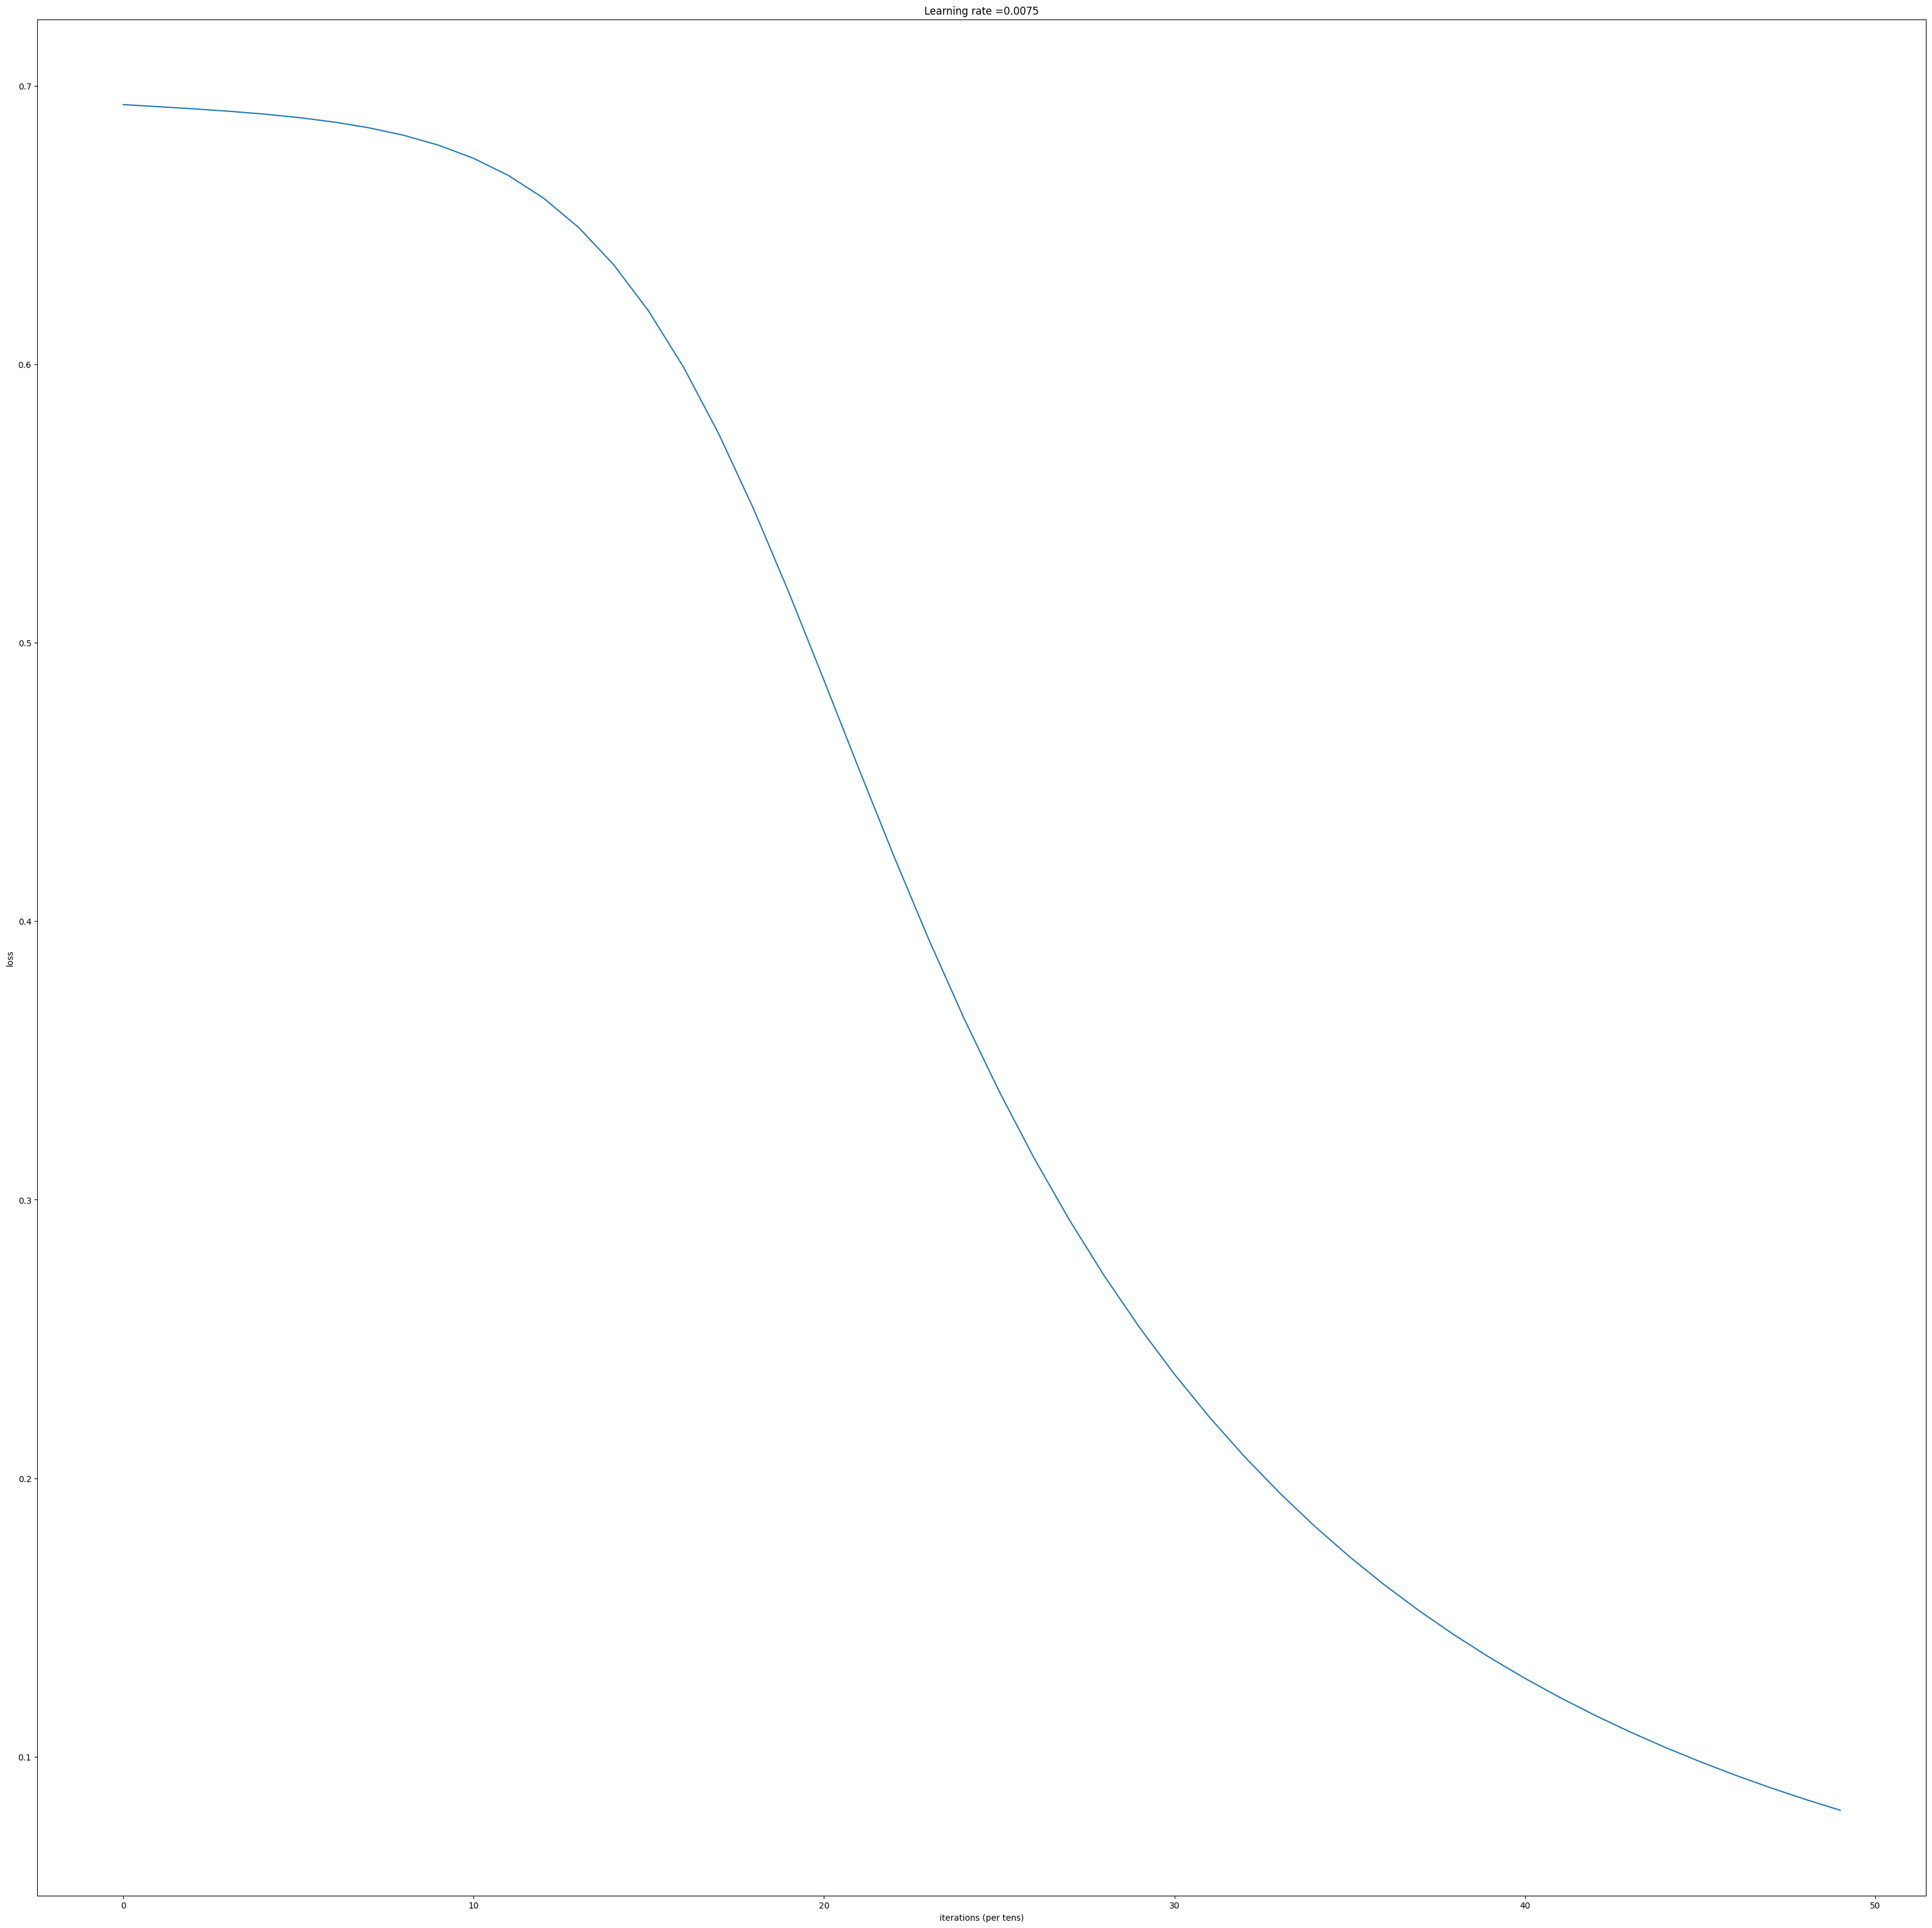

In [47]:
parameters = two_layer_model(X_train, y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 5000, print_loss=True)

## Predict the review for our movies!

In [52]:
predictions_train = predict(X_train, y_train, parameters)

Accuracy: 0.9962499999999999


In [53]:
predictions_val = predict(X_val, y_val, parameters)

Accuracy: 0.8507462686567162


##  11. Analyze Sentiment Results

Let's take a look at some examples the 2-layer model labeled incorrectly

In [54]:
def print_mislabeled_reviews(X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_reviews = len(mislabeled_indices[0])
    for i in range(num_reviews):
        index = mislabeled_indices[1][i]

        print((" ").join(cv.inverse_transform(X[index].reshape(1, -1))[0]))
        print("Prediction: " + str(int(p[0,index])) + " \n Class: " + str(y[0,index]))

In [55]:
print_mislabeled_reviews(X_val.T, y_val, predictions_val)

actors attempt beauty believable big bit charismatic claims definitely delivery did didnt disappointing disaster entertained fact film fine group job line looked lost miss offensive performance playing plays plot project recommend rent scenes screen seen strong talent timing wish writing
Prediction: 0 
 Class: 1
acting add annoying bad change character dicaprio did director does eyes film filmmakers films glad going good great half hand hardly impressive just kate learned lesson love mean million movie opinion oscar performance possible really romance romantic second ship shouldnt single sit stories story sure talented think thinking time times titanic try watching win wonderful wont worst
Prediction: 0 
 Class: 1
anna appearance away bad better bible big black blue book boys build capture cat catch chaos child city comic connected cops cult deal didnt doesnt earth edge exactly extreme far favorite fictional fine finished followed fond form fun gang gas genius giant god going good got 

**Exercise**: Provide explanation as to why these examples were misclassified below.

**Type your answer here**